In [3]:
import numpy as np
import matplotlib.pylab as plot
from astropy.io import ascii,fits
from scipy import interpolate
from BurstCube.LocSim.Detector import *
from BurstCube.LocSim.Spacecraft import *
from astropy.coordinates import SkyCoord
from astropy import units as u
from scipy.optimize import curve_fit
from astropy.table import Table
import healpy as hp
from pylab import cm
import matplotlib.colors as mpl_col
from bia_proposal_tools import *

In [4]:
biadir='/Users/jracusin/Bia/'

In [5]:
## BurstCube detector variants, #100 keV as function of zenith angle
# theta=[ 0., 10., 20., 30., 40., 50., 60., 70.]
# aeff_norm= [63.214325, 65.24758,62.555805,60.09365,55.91734,49.74886,42.624546,34.68295]
# aeff_thick = [64.32149,  66.7574,67.11922,66.46347,65.181946,60.284657,55.286057,47.798527]
# aeff_thin = [63.341167, 62.48086,60.393826,56.34477,51.960888,43.91578,35.622242,26.564388]
# aeff_BGO = [63.770813, 65.577614,63.894028,61.1921,57.121777,50.38195,43.28782,33.92687]
Aeff_fact_norm=64.8
index_norm=0.587
Aeff_fact_thin=64.35
index_thin=0.8
Aeff_fact_thick=70.
index_thick=0.5
Aeff_fact_BGO=65
index_BGO=0.5
Aeff_fact_4mod=64.8*4
index_4mod=0.8

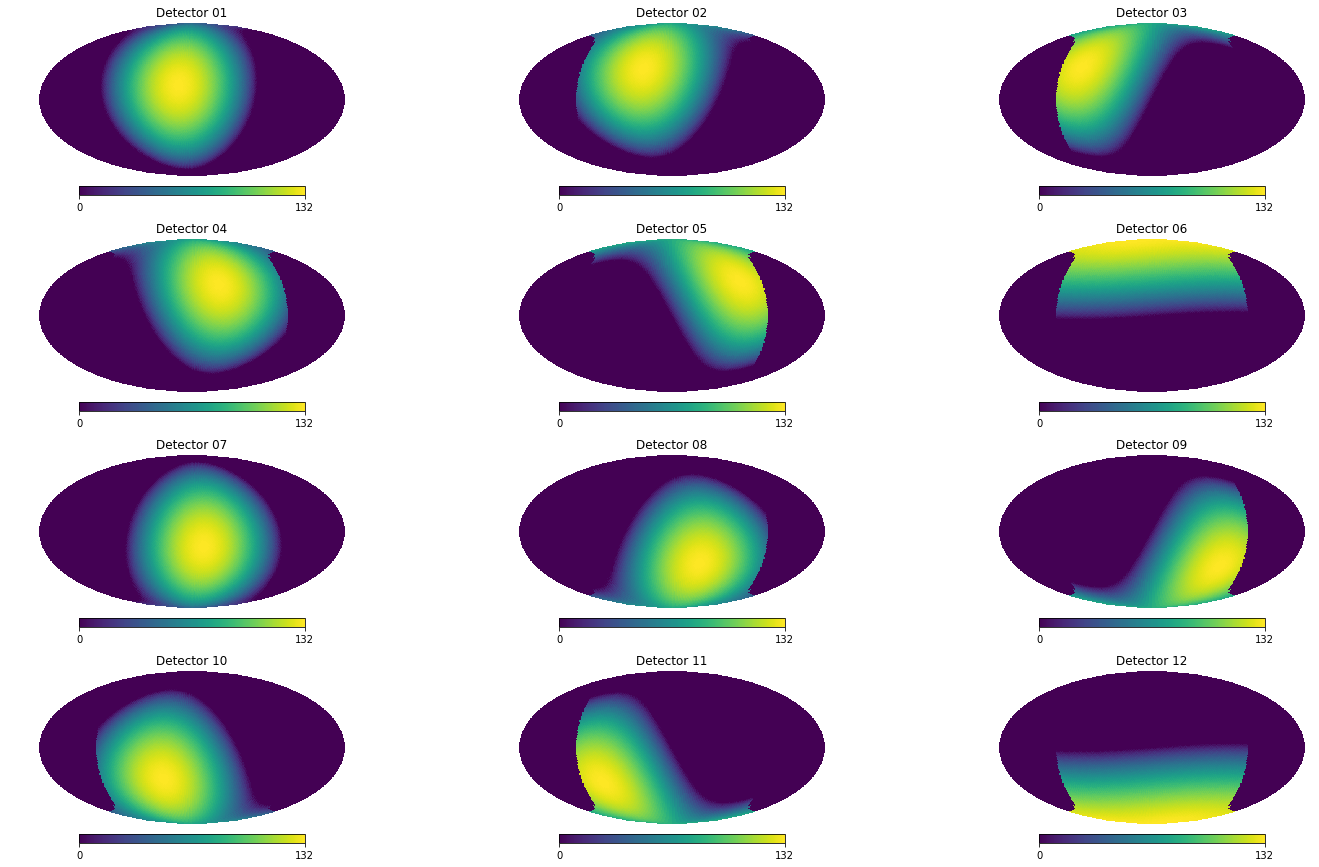

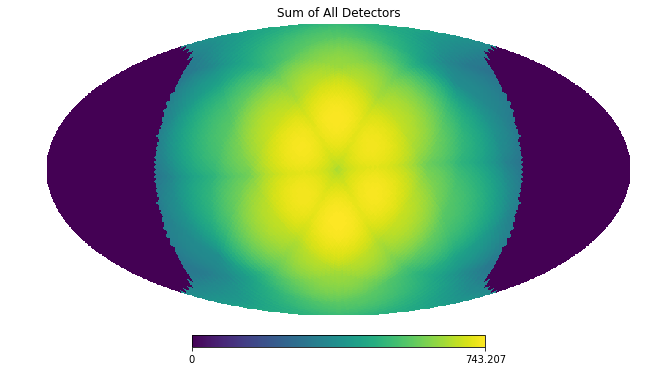

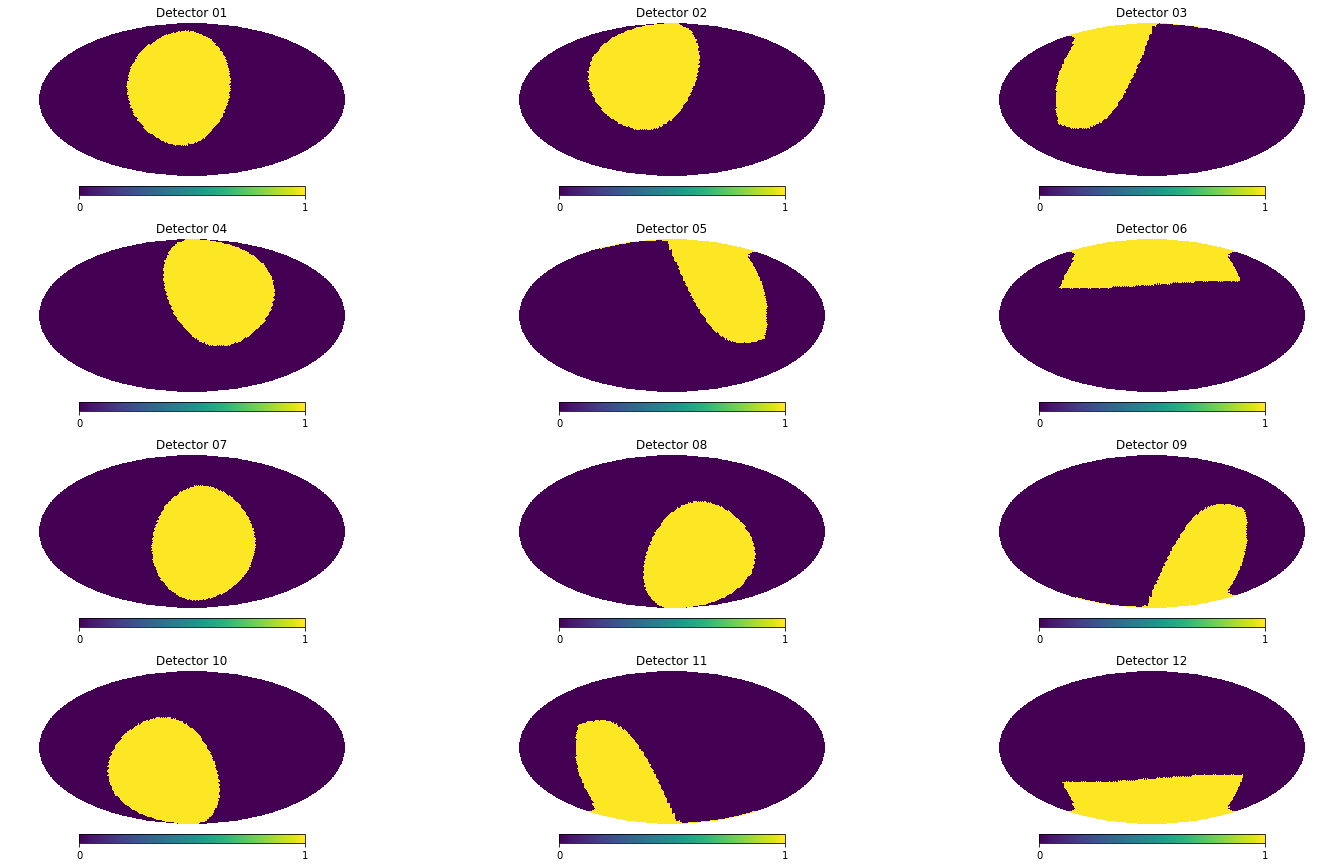

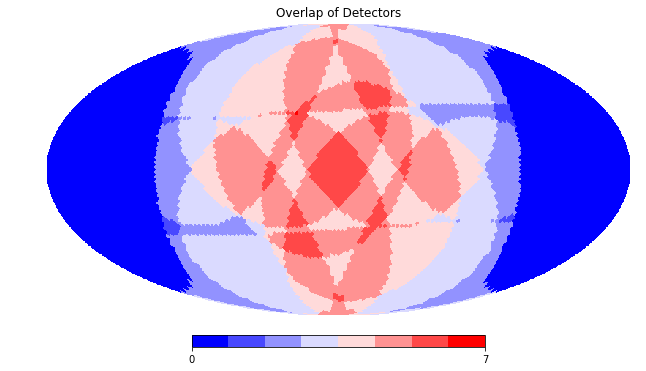

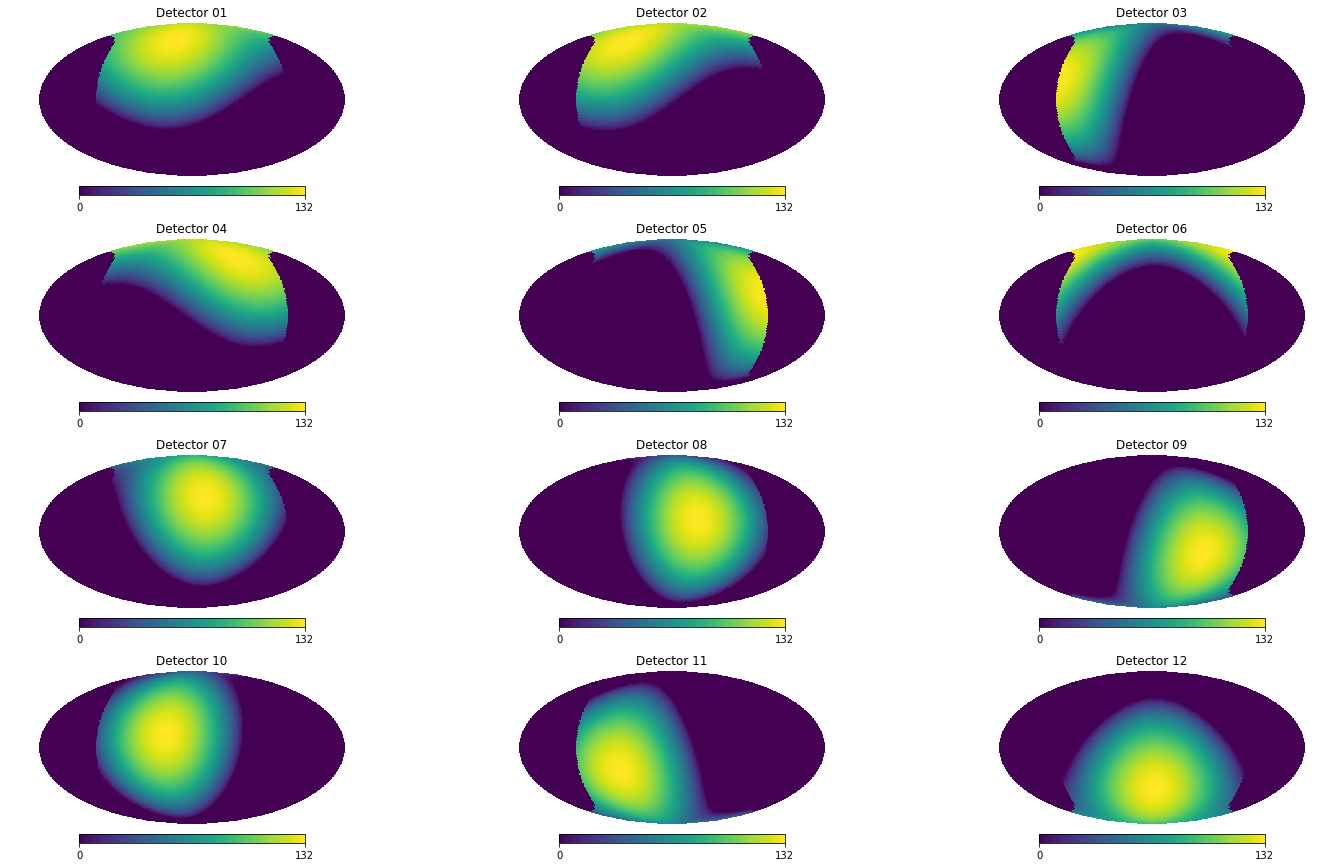

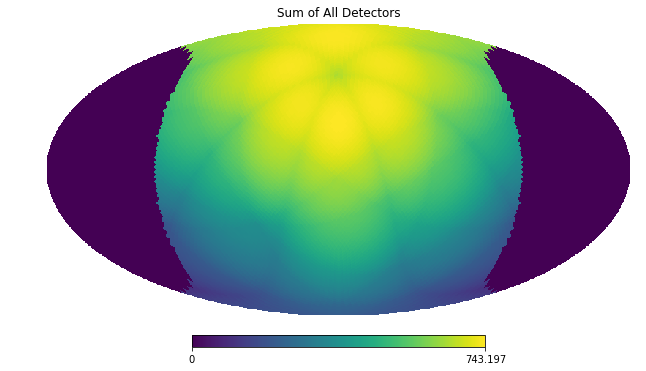

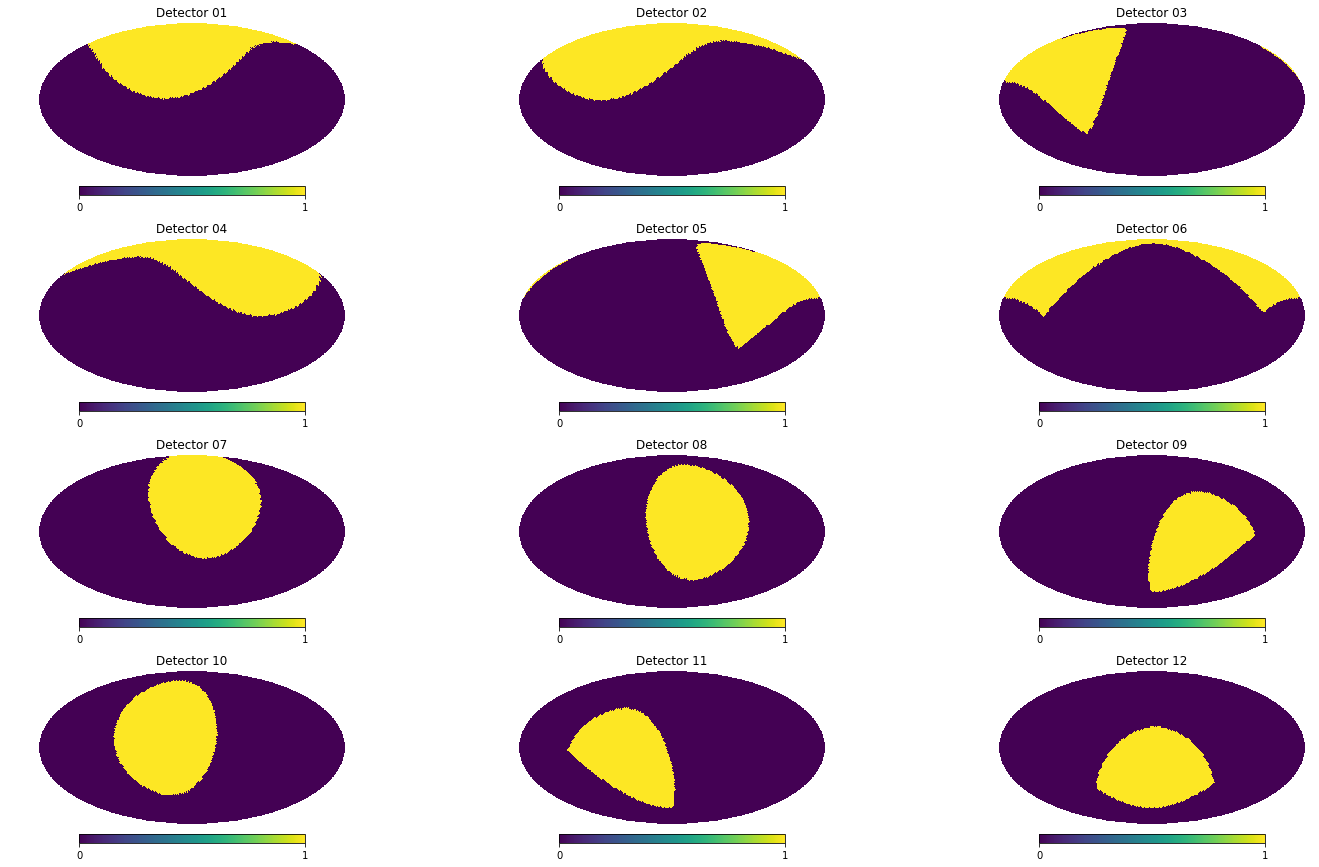

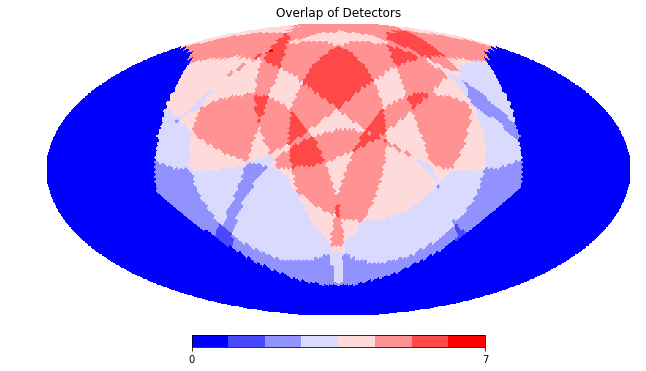

In [6]:
## GBM Aeff Map
gbm_pointings = {'01': ('45:54:0','20:36:0'),
            '02': ('45:6:0','45:18:0'),
            '03': ('58:24:0','90:12:0'),
            '04': ('314:54:0','45:12:0'),
            '05': ('303:12:0','90:18:0'),
            '06': ('3:24:0','89:48:0'),
            '07': ('224:54:0','20:24:0'),
            '08': ('224:36:0','46:12:0'),
            '09': ('236:36:0','90:0:0'),
            '10': ('135:12:0','45:36:0'),
            '11': ('123:42:0','90:24:0'),
            '12': ('183:42:0','90:18:0')}

#aeff_gbm=getGBMdata('/Users/jracusin/BurstCube/gitrep/Simulation/GEANT3/gbm_effective_area.dat')
sc,gbm_fs_onaxis,exposure_positions,pointings,gbm_exposures_onaxis=plot_exposures(gbm_pointings,132.,index=0.8)#,lat='50:00:00',lon='260:00:00') 
fs_det_onaxis=num_detectors(sc,exposure_positions,pointings)
sc,gbm_fs_rocked,exposure_positions,pointings,gbm_exposures_rocked=plot_exposures(gbm_pointings,132.,index=0.8,lat='50:00:00',lon='260:00:00') 
fs_det_rocked=num_detectors(sc,exposure_positions,pointings)

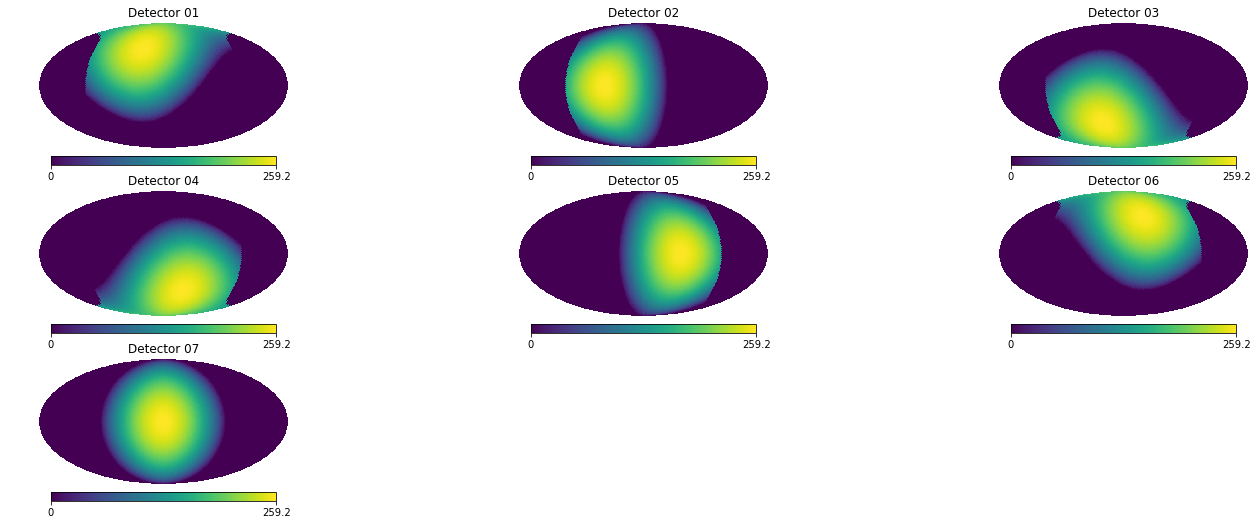

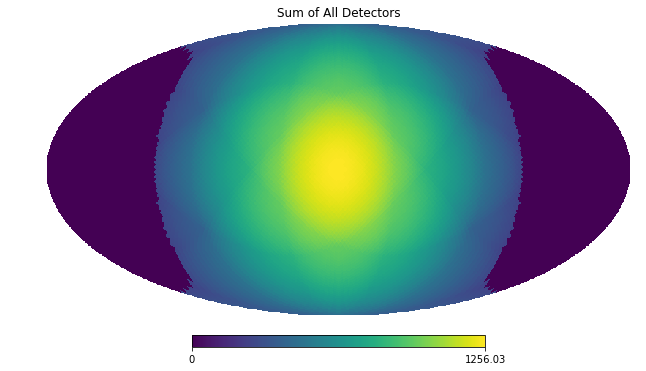

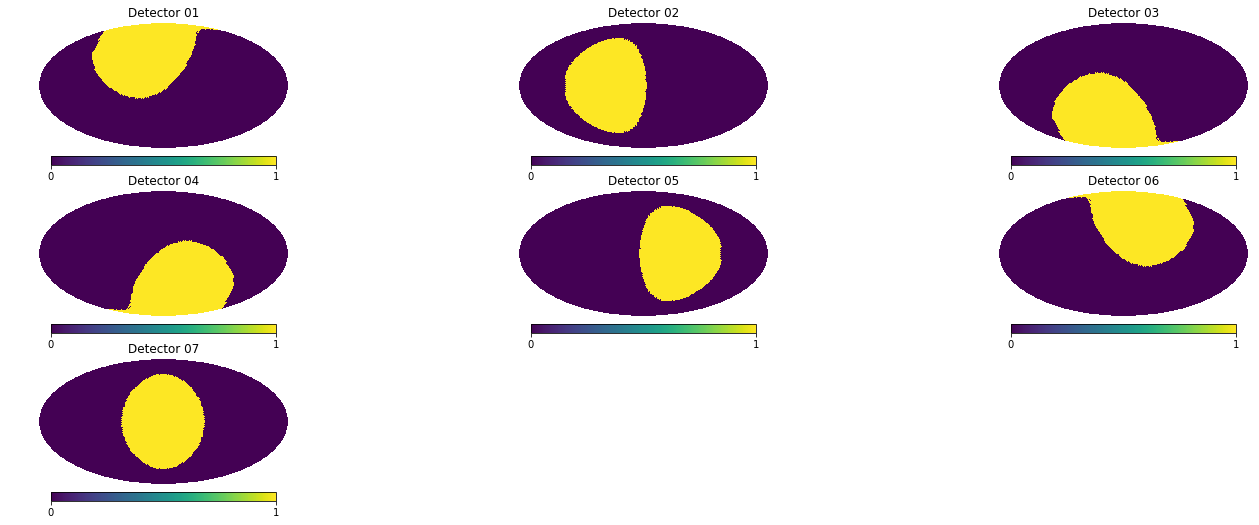

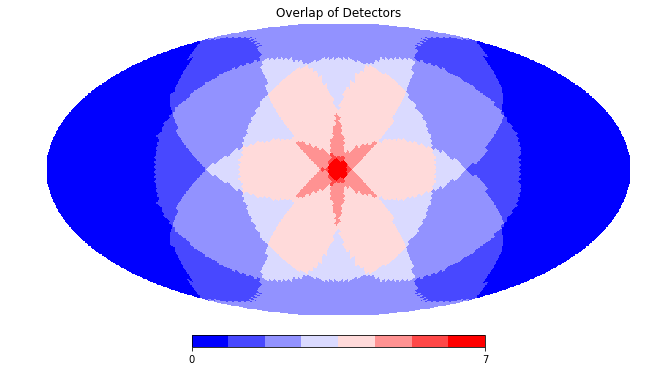

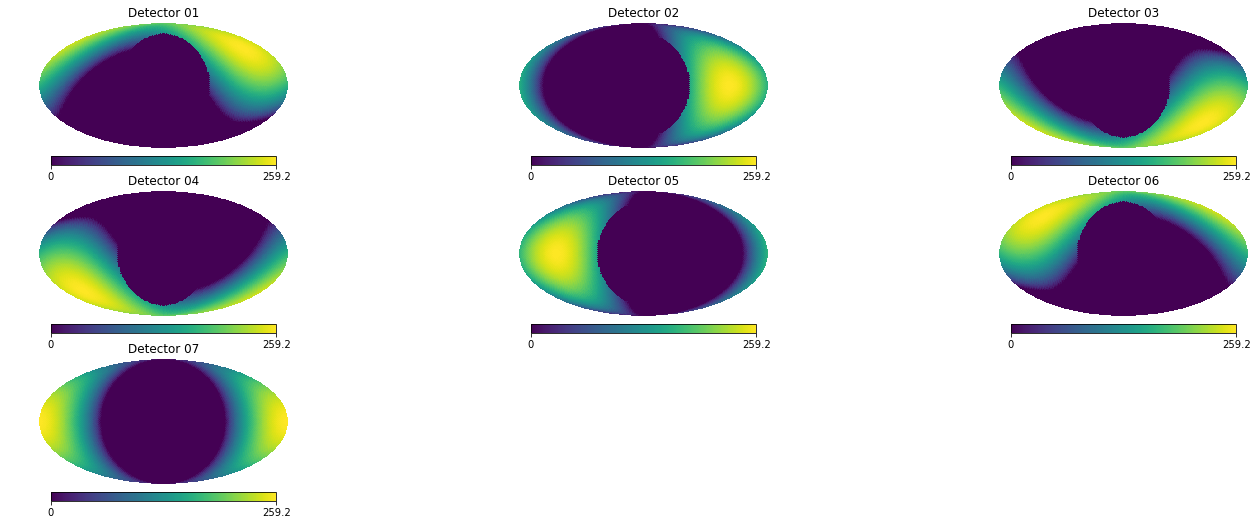

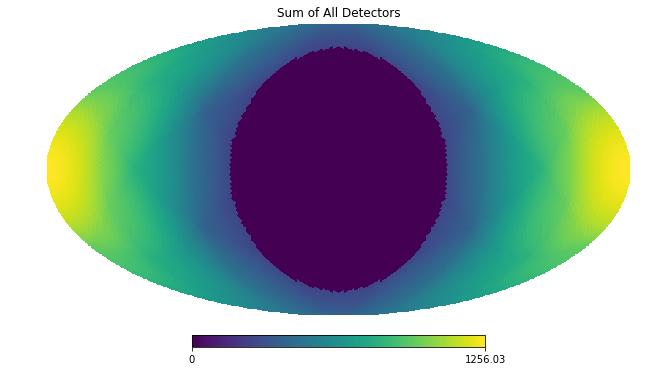

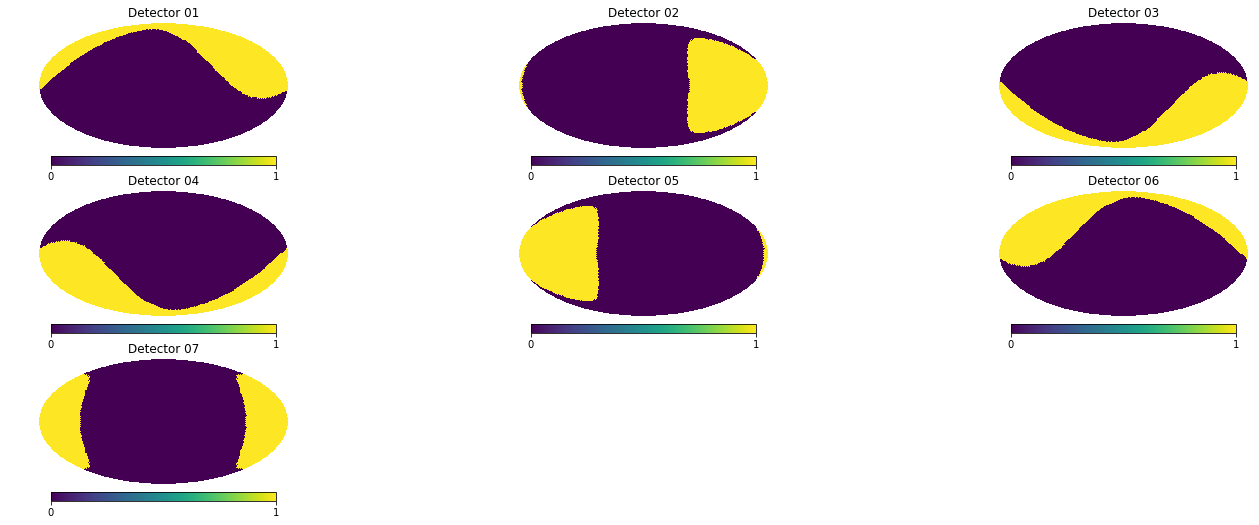

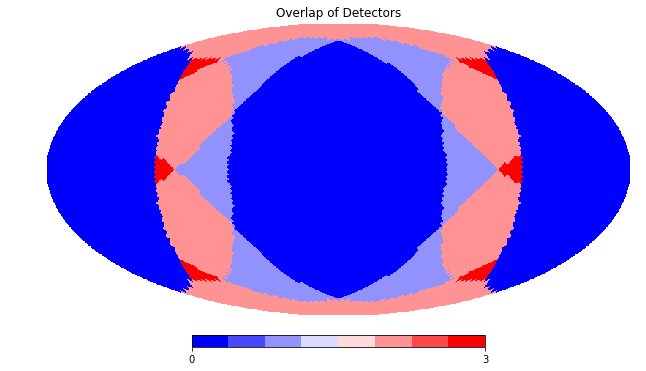

In [7]:
## 7 super detectors
ang=55
bia_pointings = {'01': ('30:0:0',str(ang)+':0:0'),
                 '02': ('90:0:0',str(ang)+':0:0'),
                 '03': ('150:0:0',str(ang)+':0:0'),
                 '04': ('210:0:0',str(ang)+':0:0'),
                 '05': ('270:0:0',str(ang)+':0:0'),
                 '06': ('330:0:0',str(ang)+':0:0'),
                 '07': ('0:0:0','0:0:0')}
sc,fs,exposure_positions,pointings,exposures=plot_exposures(bia_pointings,Aeff_fact_4mod,index=index_4mod) 
fs_det=num_detectors(sc,exposure_positions,pointings)
sc2,fs2,exposure_positions2,pointings2,exposures=plot_exposures(bia_pointings,Aeff_fact_4mod,index=index_4mod,lat='0:0:0',lon='80:0:0',antiEarth=True,Earth=False) 
fs_det2=num_detectors(sc2,exposure_positions2,pointings2)

/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  
/Users/jracusin/anaconda/lib/python2.7/site-packages/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/jracusin/anaconda/lib/python2.7/site-packages/healpy/projaxes.py:1053: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/jracusin/anaconda/lib/python2.7/site-packages/healpy/projaxes.py:1054: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in divide
  This is separate from the ipykernel package so we can avoid doing impor

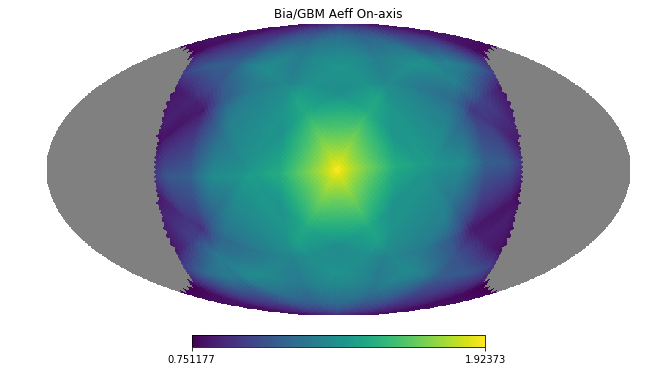

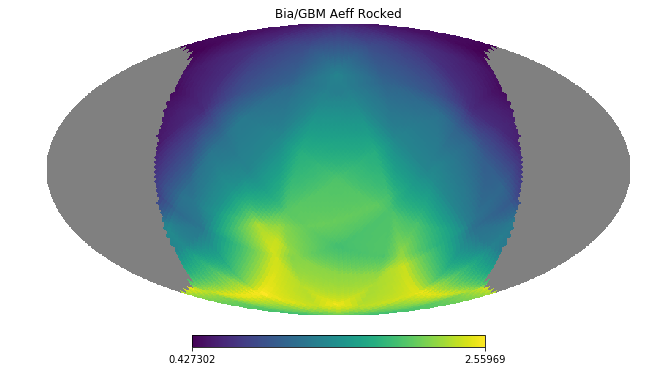

In [8]:
# Ratio of Bia to GBM Aeff for GBM both on-axis and rocked
hp.mollview(fs/gbm_fs_onaxis,title='Bia/GBM Aeff On-axis')
hp.mollview(fs/gbm_fs_rocked,title='Bia/GBM Aeff Rocked')

7
Fraction of sky seen by # of detectors:
0 0.315104166667
1 0.129801432292
2 0.269287109375
3 0.0961100260417
4 0.167317708333
5 0.0185546875
6 0.00154622395833
3
Fraction of sky seen by # of detectors:
0 0.619466145833
1 0.130533854167
2 0.234456380208
7
Fraction of sky seen by # of detectors:
0 0.305338541667
1 0.0
2 0.0726725260417
3 0.271728515625
4 0.327880859375
5 0.0185546875
6 0.00154622395833


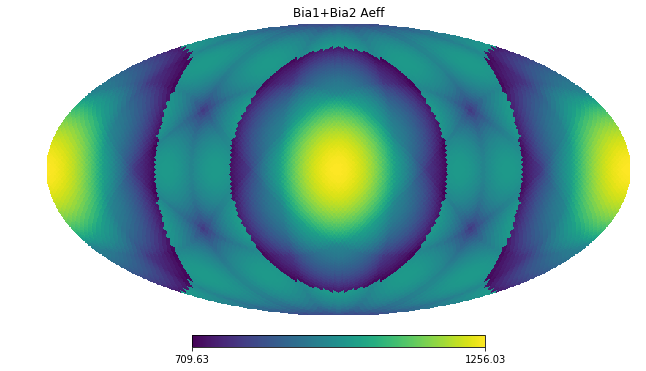

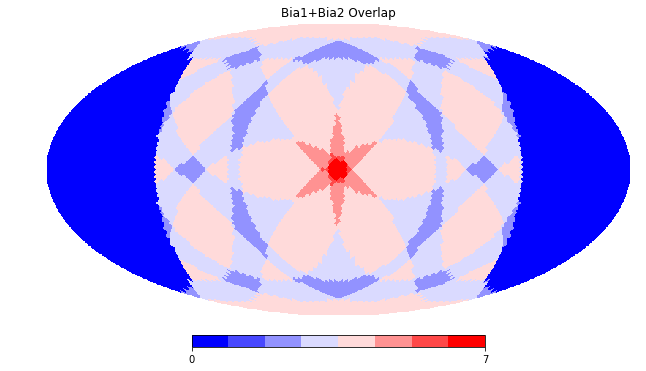

In [9]:
hp.mollview(fs+fs2,title='Bia1+Bia2 Aeff')
cmap_skewed=colormap_skewed(fs_det+fs_det2)
hp.mollview(fs_det+fs_det2,title='Bia1+Bia2 Overlap',cmap=cmap_skewed)
num_detectors_frac(fs_det)
num_detectors_frac(fs_det2)
num_detectors_frac(fs_det+fs_det2)

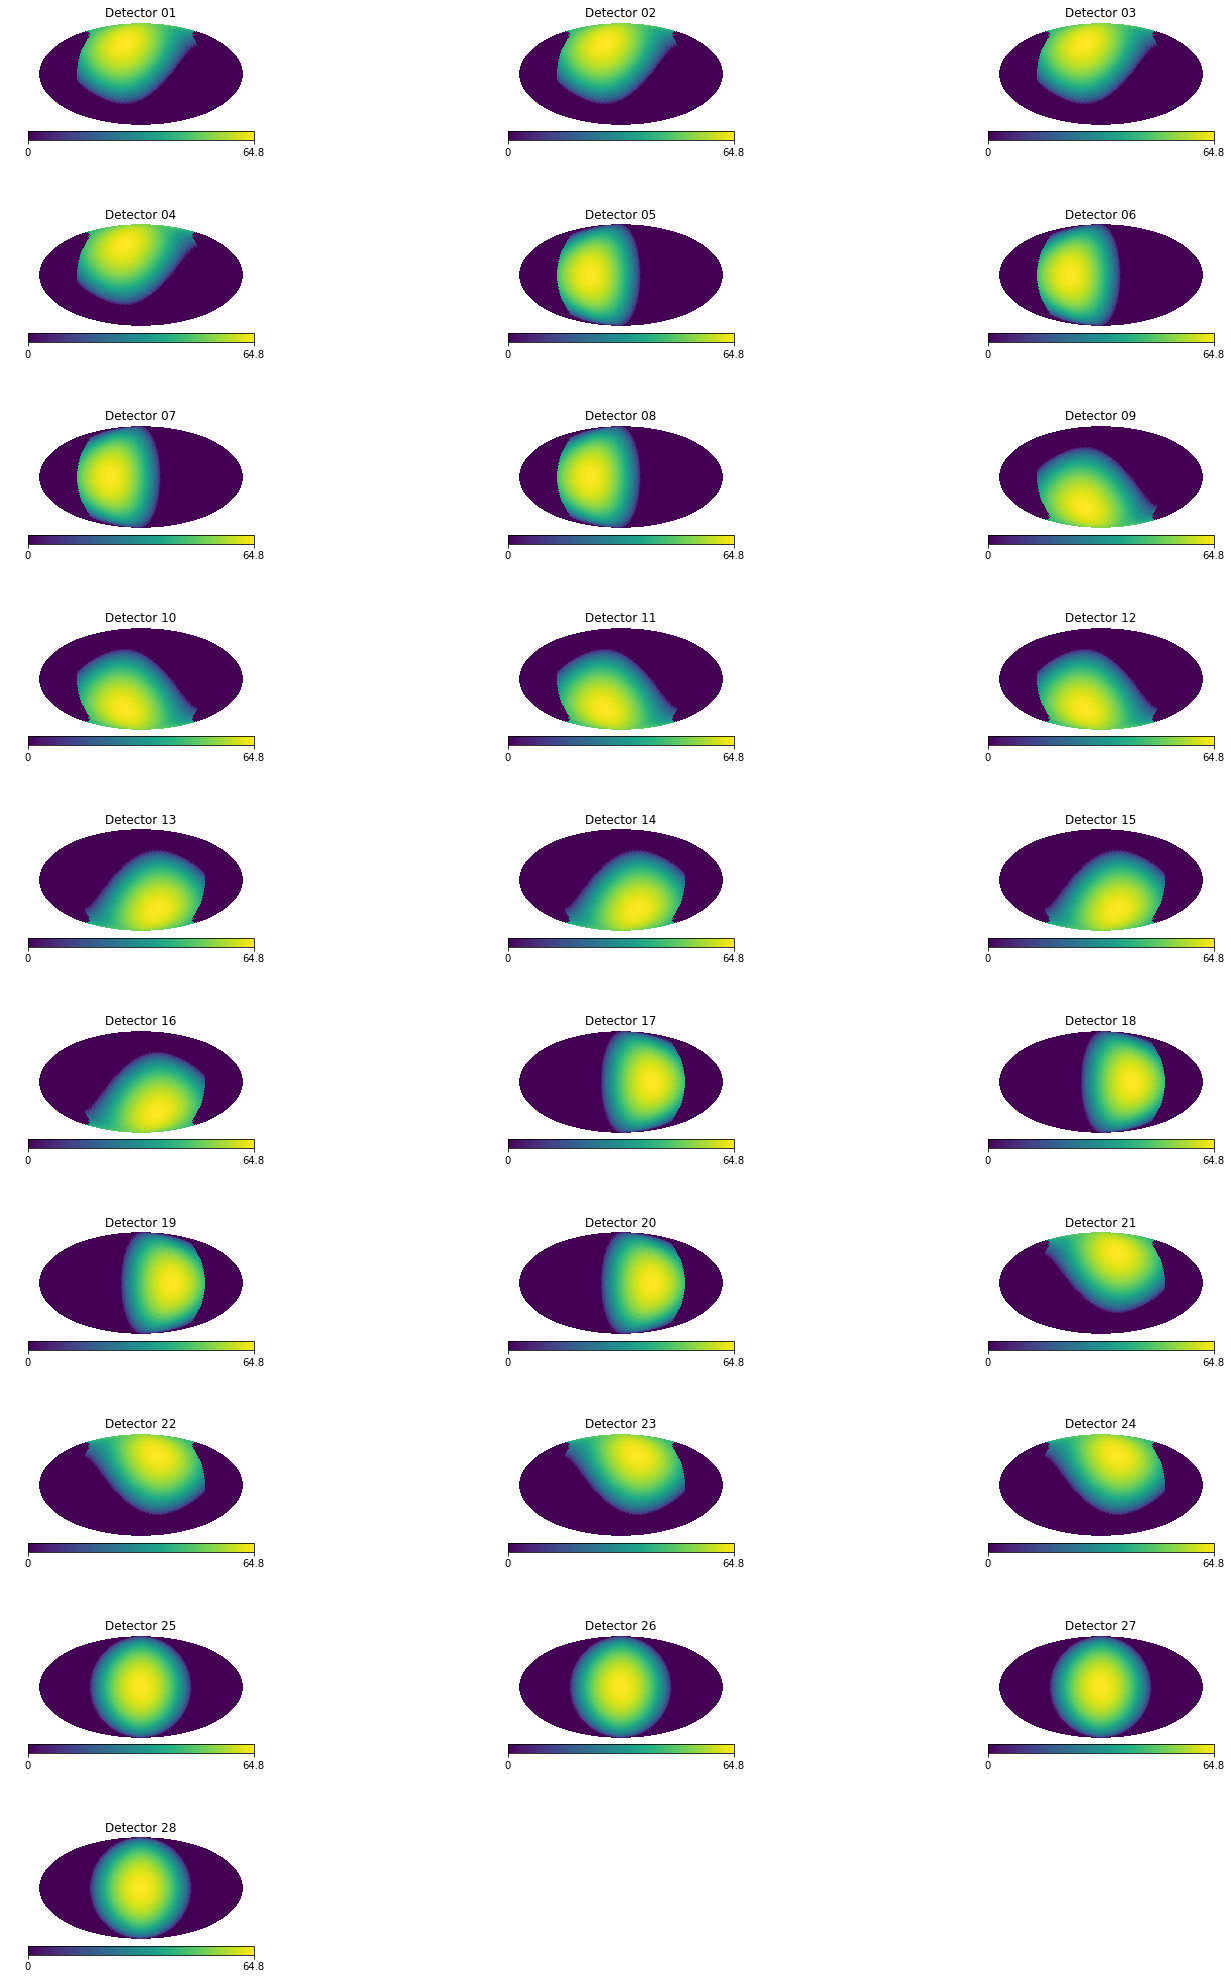

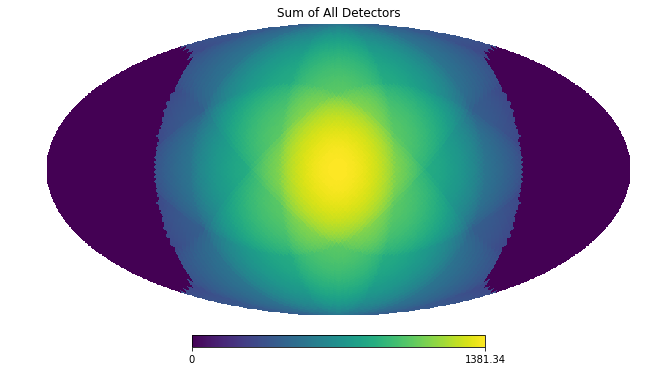

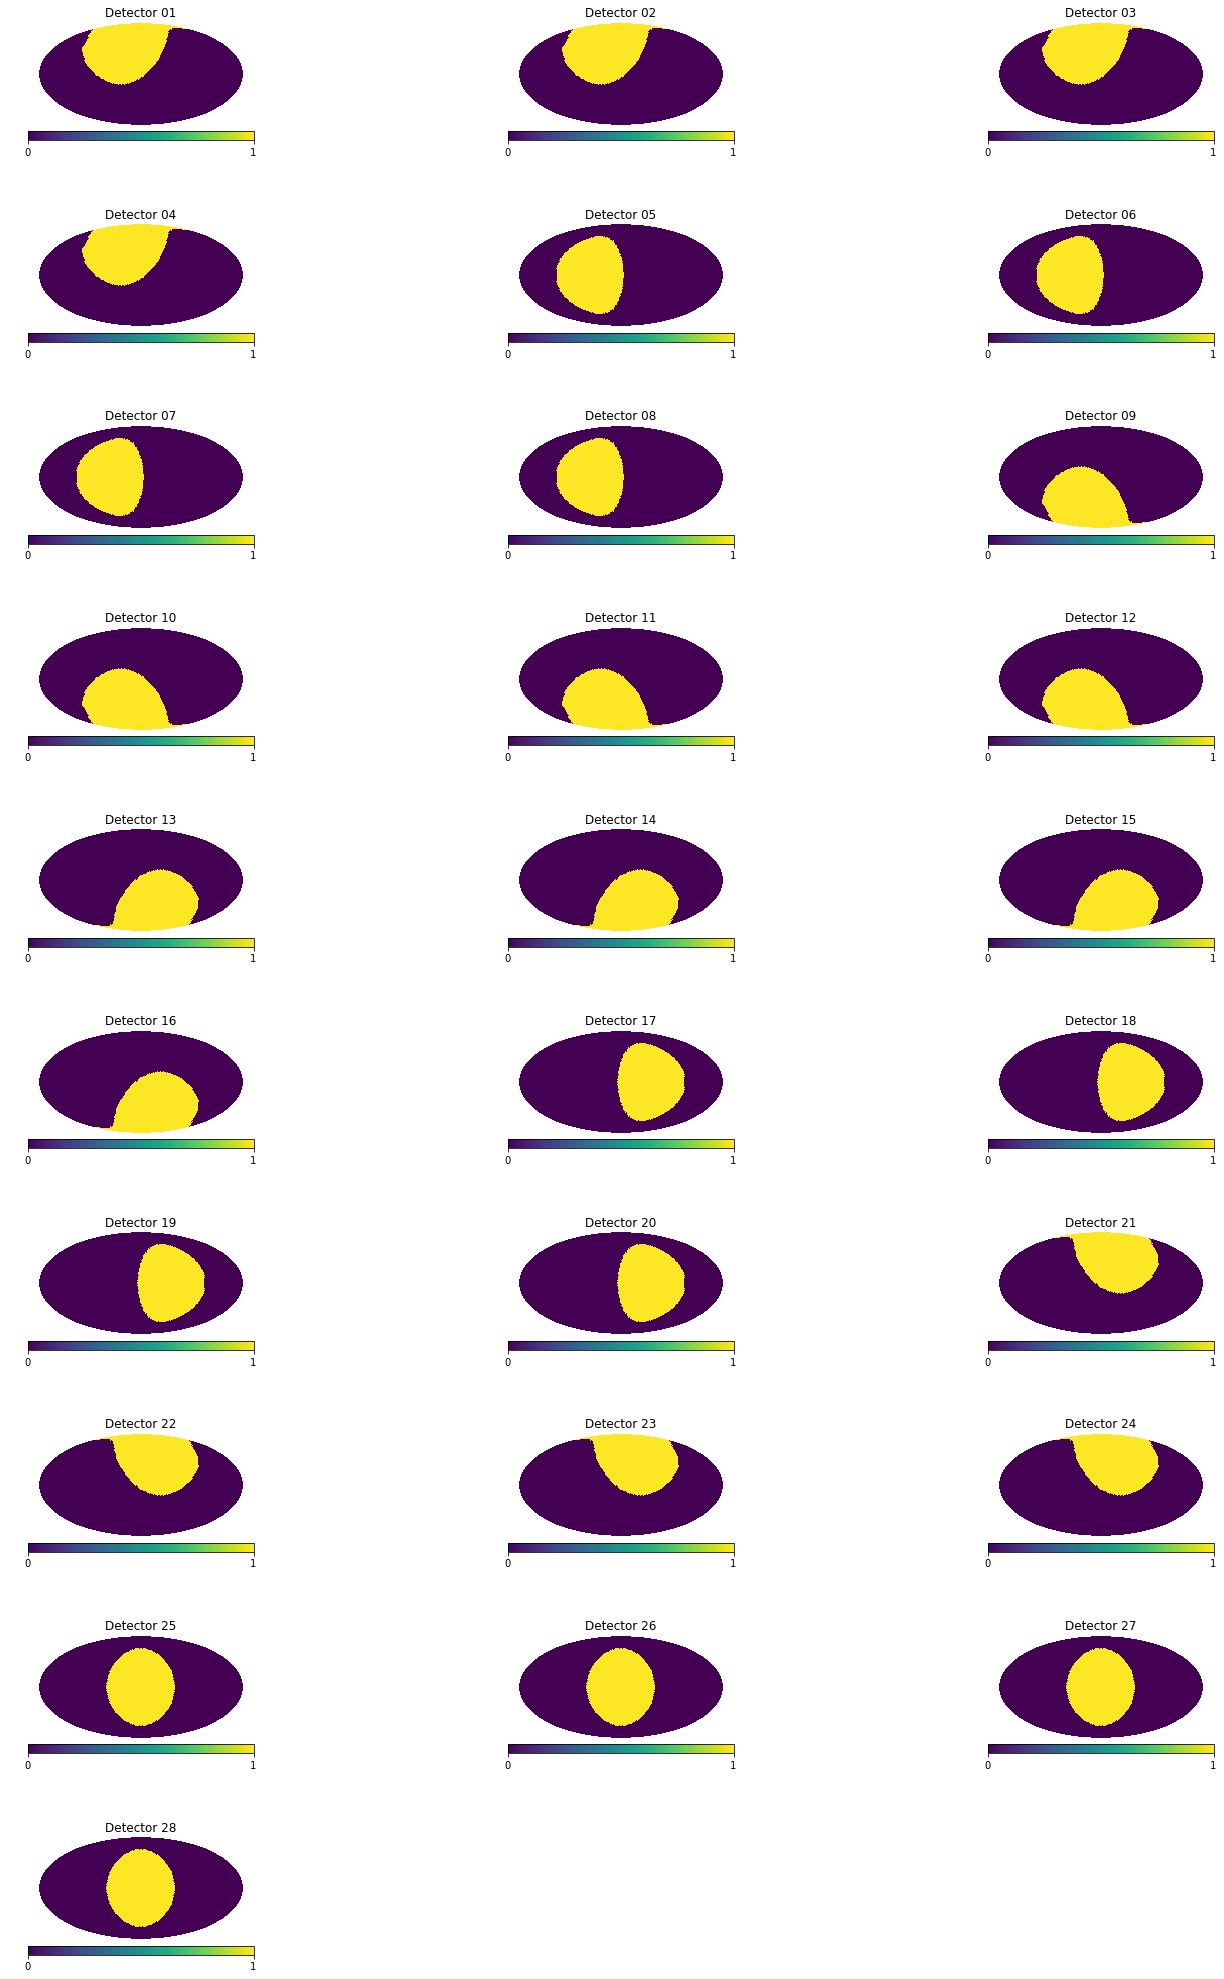

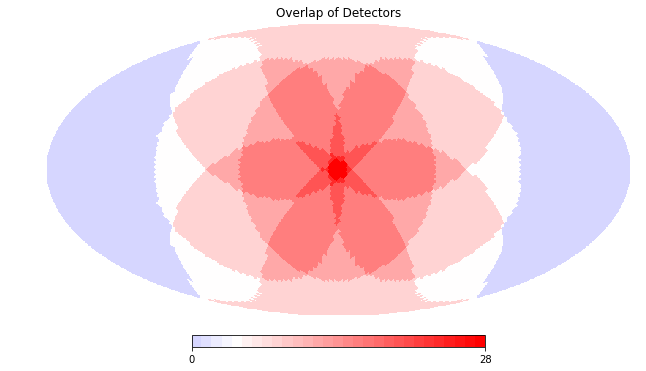

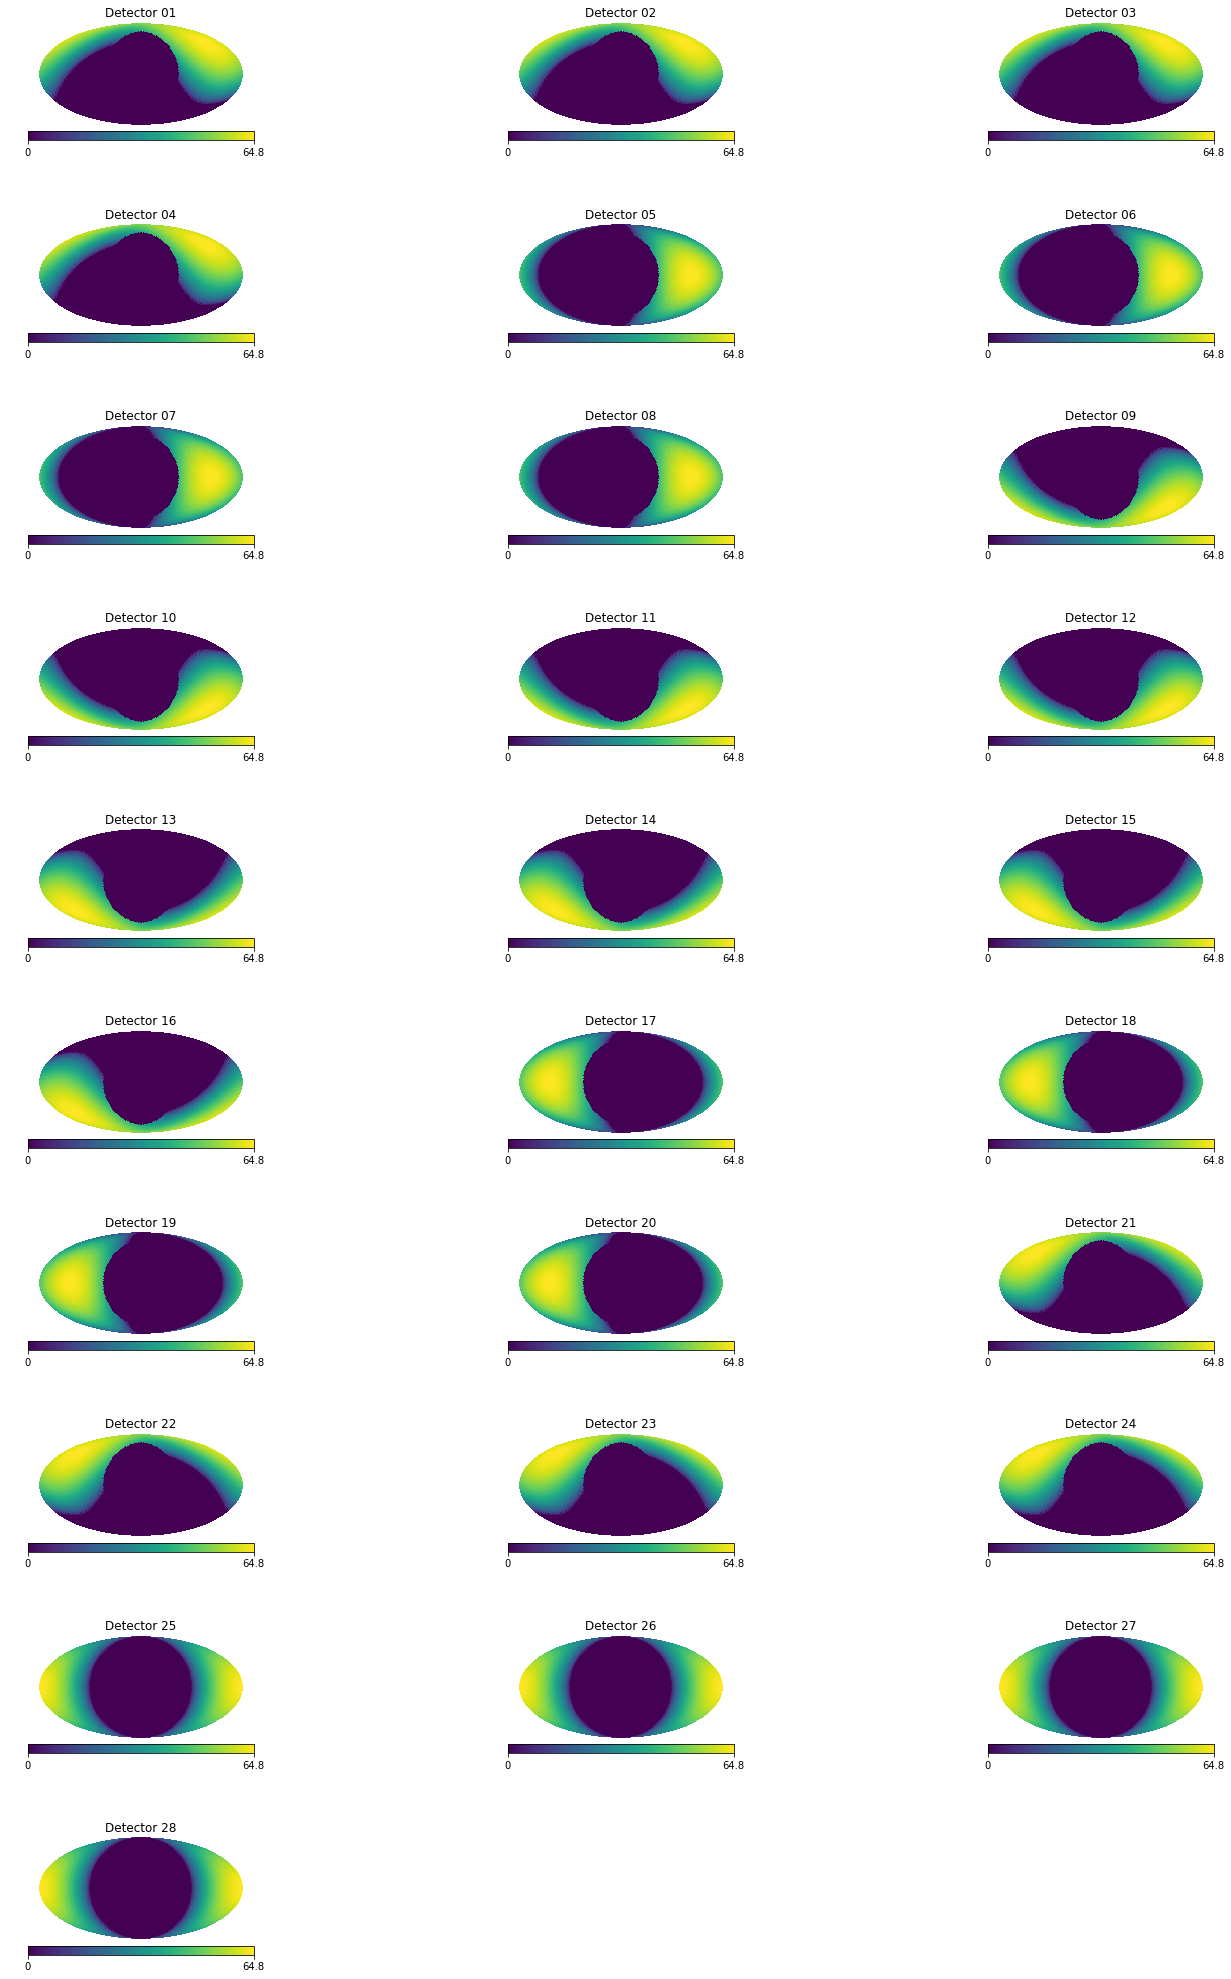

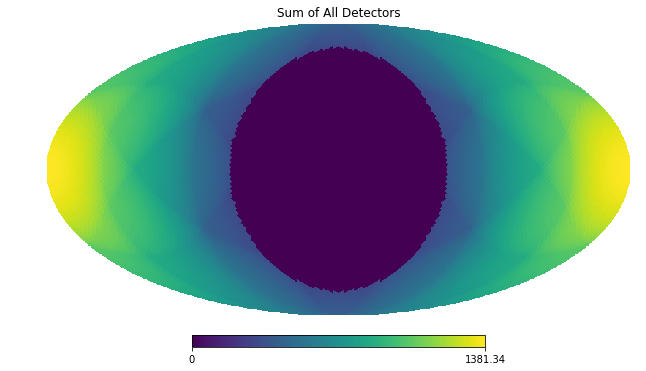

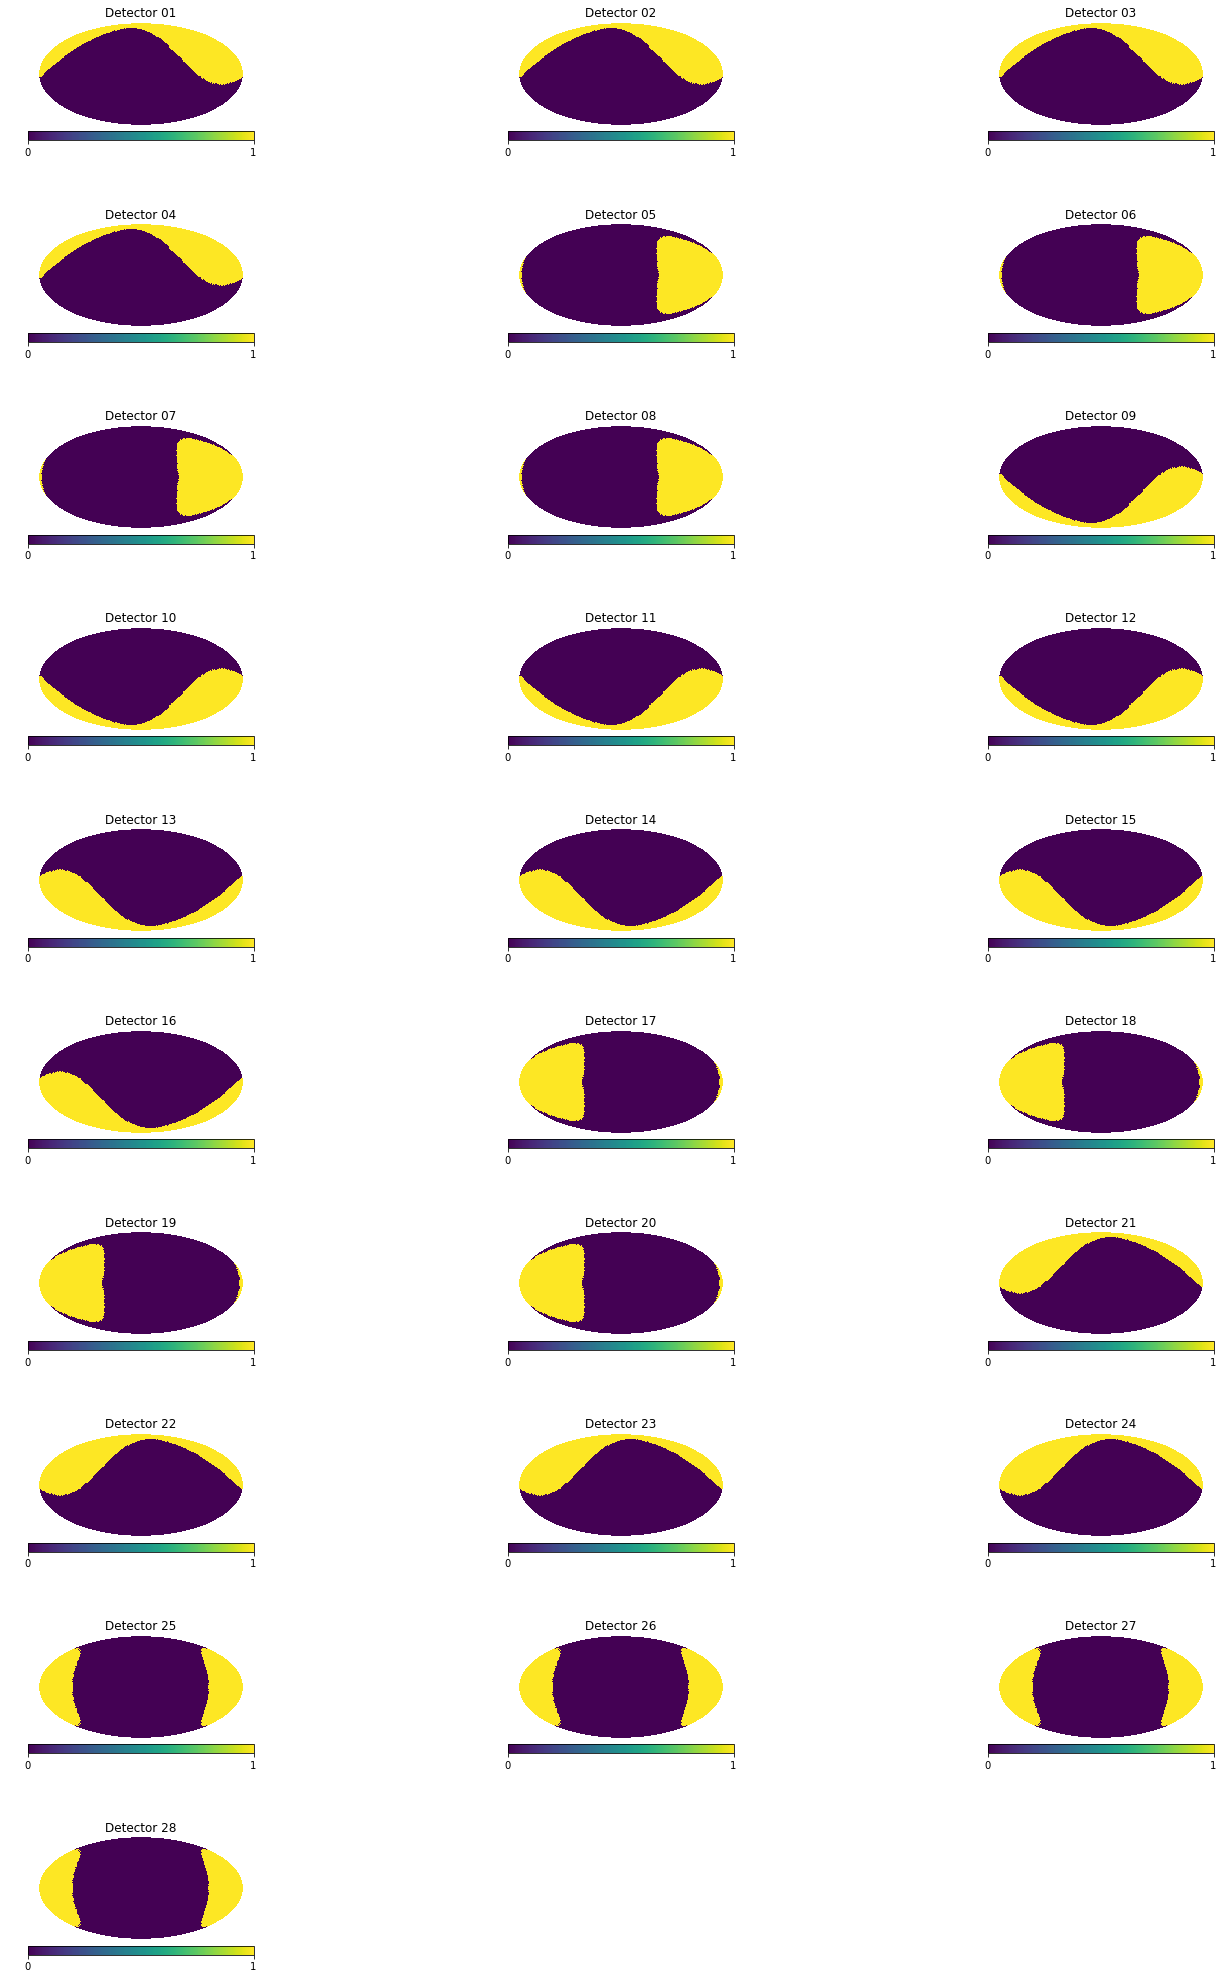

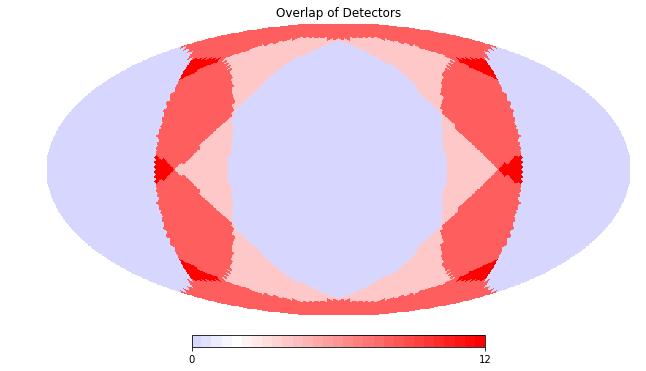

In [10]:
## 28 BC detectors with 7 clusters of 4 copointed
ang=55
bia_pointings = {'01': ('30:0:0',str(ang)+':0:0'),
                '02': ('30:0:0',str(ang)+':0:0'),
                '03': ('30:0:0',str(ang)+':0:0'),
                '04': ('30:0:0',str(ang)+':0:0'),
                '05': ('90:0:0',str(ang)+':0:0'),
                '06': ('90:0:0',str(ang)+':0:0'),
                '07': ('90:0:0',str(ang)+':0:0'),
                '08': ('90:0:0',str(ang)+':0:0'),
                '09': ('150:0:0',str(ang)+':0:0'),
                '10': ('150:0:0',str(ang)+':0:0'),
                '11': ('150:0:0',str(ang)+':0:0'),
                '12': ('150:0:0',str(ang)+':0:0'),
                '13': ('210:0:0',str(ang)+':0:0'),
                '14': ('210:0:0',str(ang)+':0:0'),
                '15': ('210:0:0',str(ang)+':0:0'),
                '16': ('210:0:0',str(ang)+':0:0'),
                '17': ('270:0:0',str(ang)+':0:0'),
                '18': ('270:0:0',str(ang)+':0:0'),
                '19': ('270:0:0',str(ang)+':0:0'),
                '20': ('270:0:0',str(ang)+':0:0'),
                '21': ('330:0:0',str(ang)+':0:0'),
                '22': ('330:0:0',str(ang)+':0:0'),
                '23': ('330:0:0',str(ang)+':0:0'),
                '24': ('330:0:0',str(ang)+':0:0'),
                '25': ('0:0:0','0:0:0'),
                '26': ('0:0:0','0:0:0'),
                '27': ('0:0:0','0:0:0'),
                '28': ('0:0:0','0:0:0')}

sc,fs,exposure_positions,pointings,exposures=plot_exposures(bia_pointings,Aeff_fact_norm,index=index_norm) 
fs_det=num_detectors(sc,exposure_positions,pointings)
sc2,fs2,exposure_positions2,pointings2,exposures=plot_exposures(bia_pointings,Aeff_fact_norm,index=index_norm,lat='0:0:0',lon='80:0:0',antiEarth=True,Earth=False) 
fs_det2=num_detectors(sc2,exposure_positions2,pointings2)#,antiEarth=True)

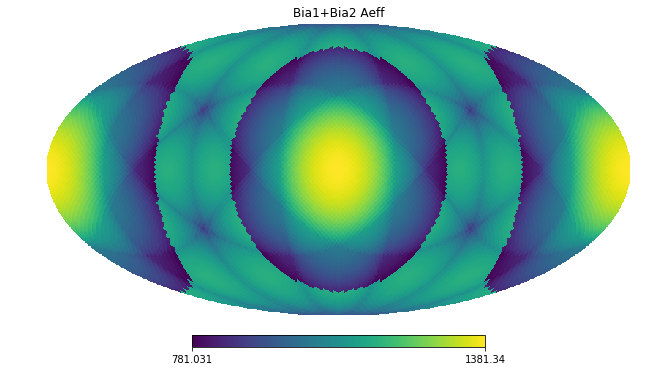

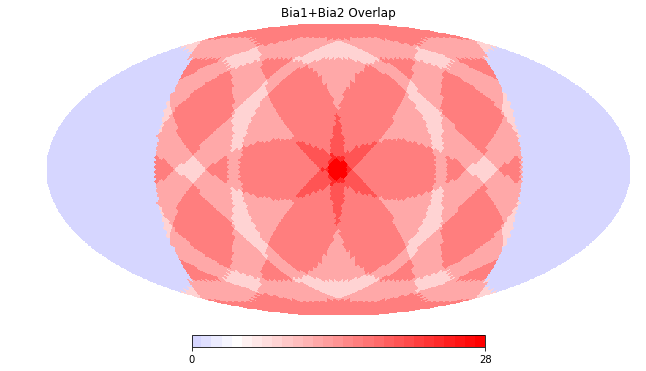

In [11]:
hp.mollview(fs+fs2,title='Bia1+Bia2 Aeff')
cmap_skewed=colormap_skewed(fs_det+fs_det2)
hp.mollview(fs_det+fs_det2,title='Bia1+Bia2 Overlap',cmap=cmap_skewed)

/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


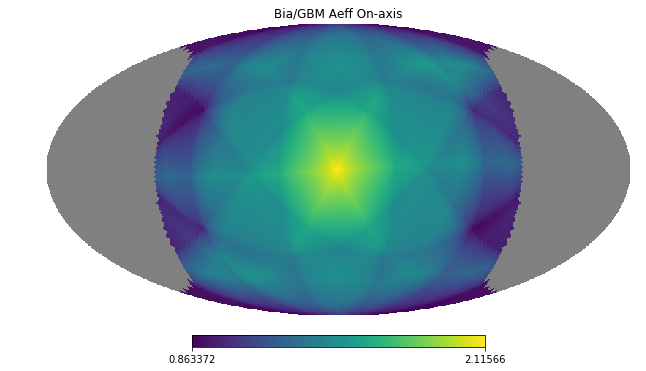

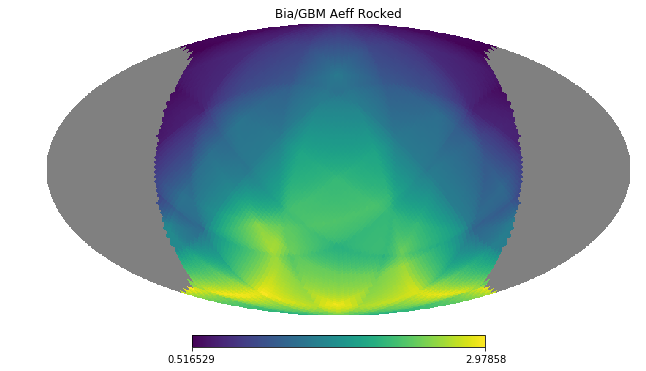

In [12]:
# Ratio of Bia to GBM Aeff for GBM both on-axis and rocked
hp.mollview(fs/gbm_fs_onaxis,title='Bia/GBM Aeff On-axis')
hp.mollview(fs/gbm_fs_rocked,title='Bia/GBM Aeff Rocked')

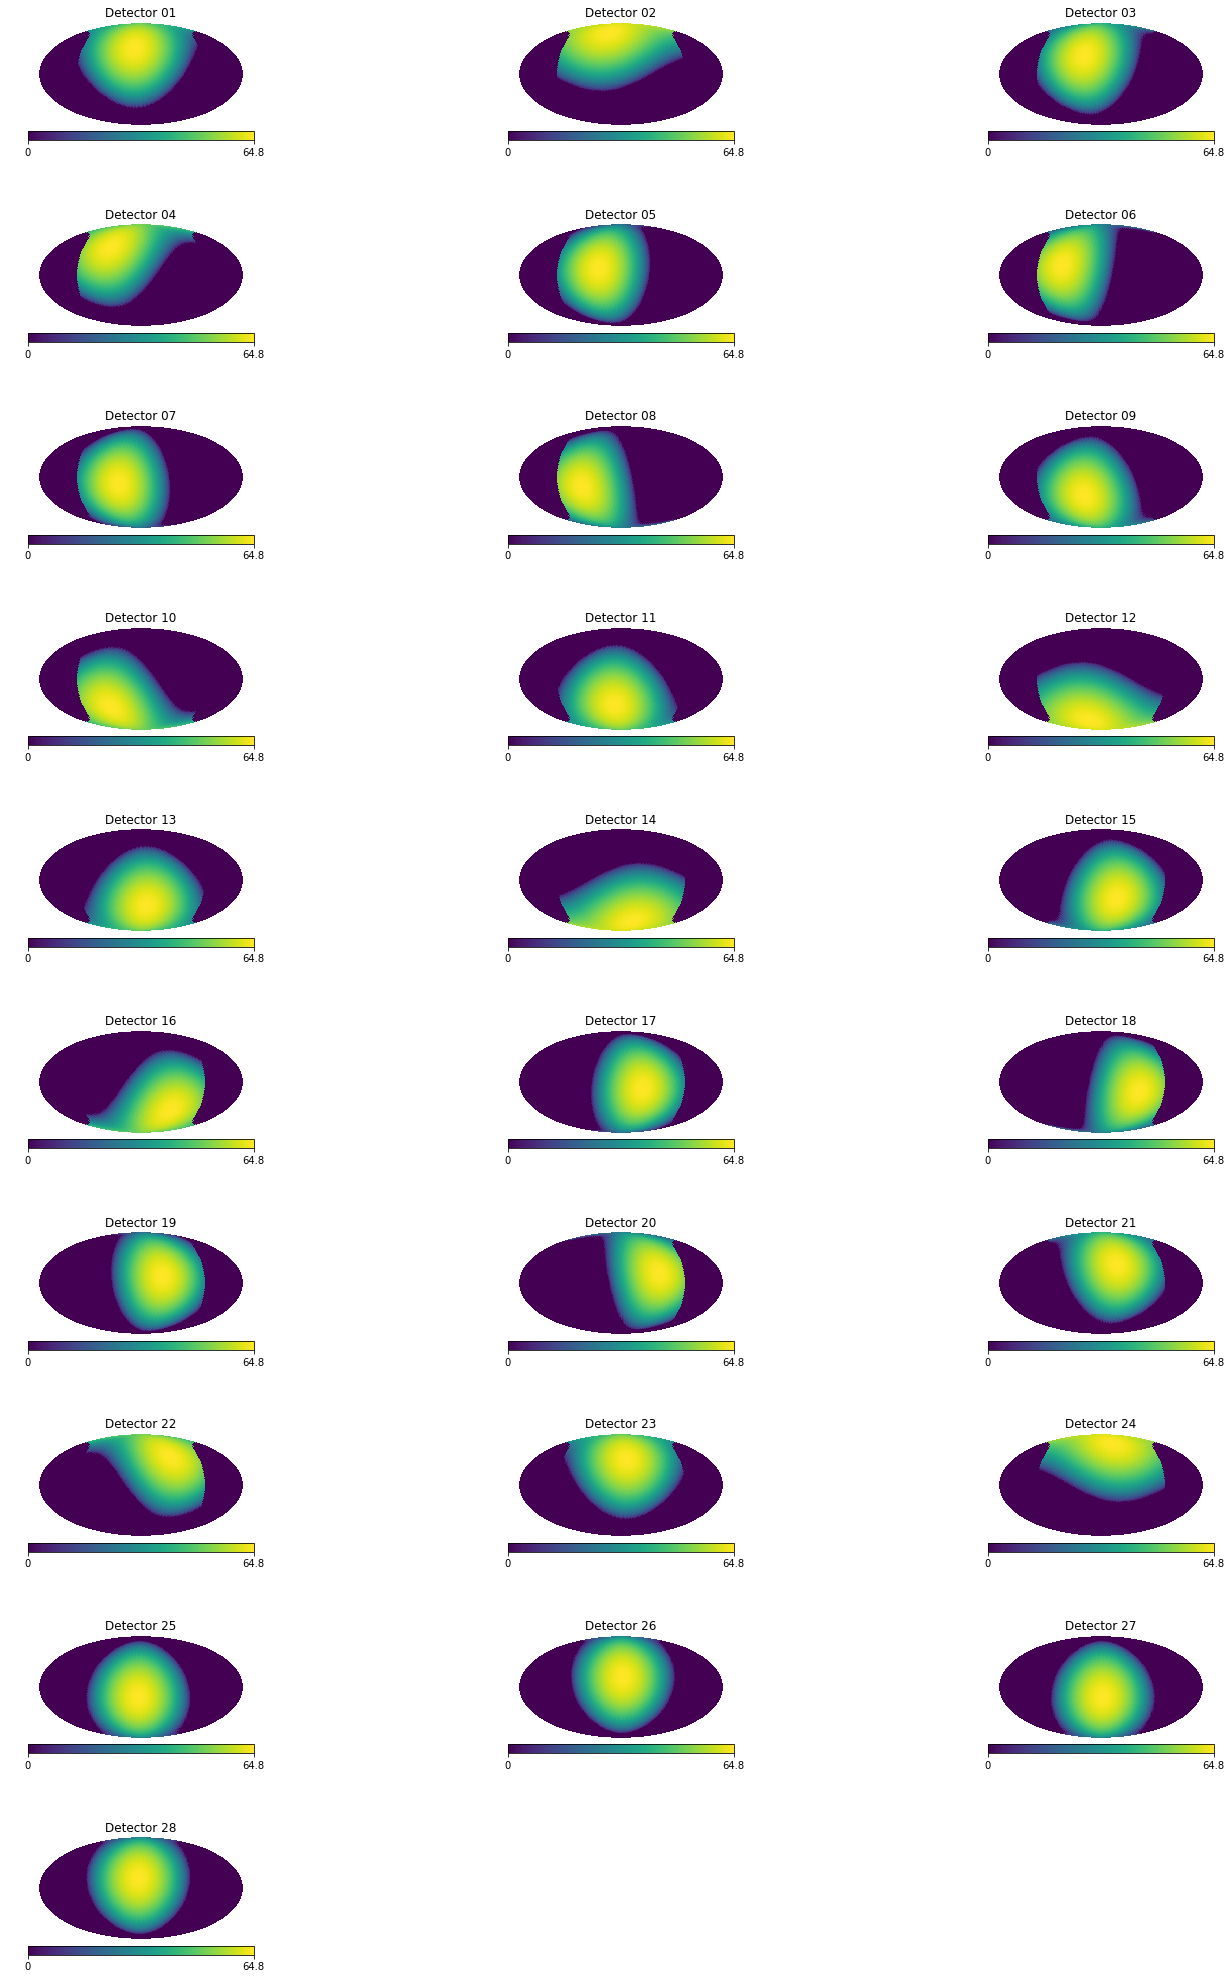

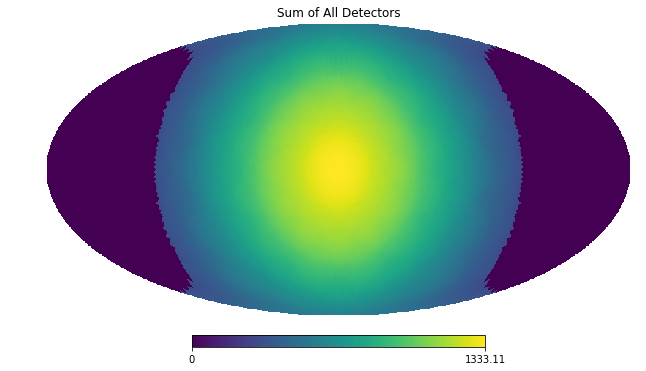

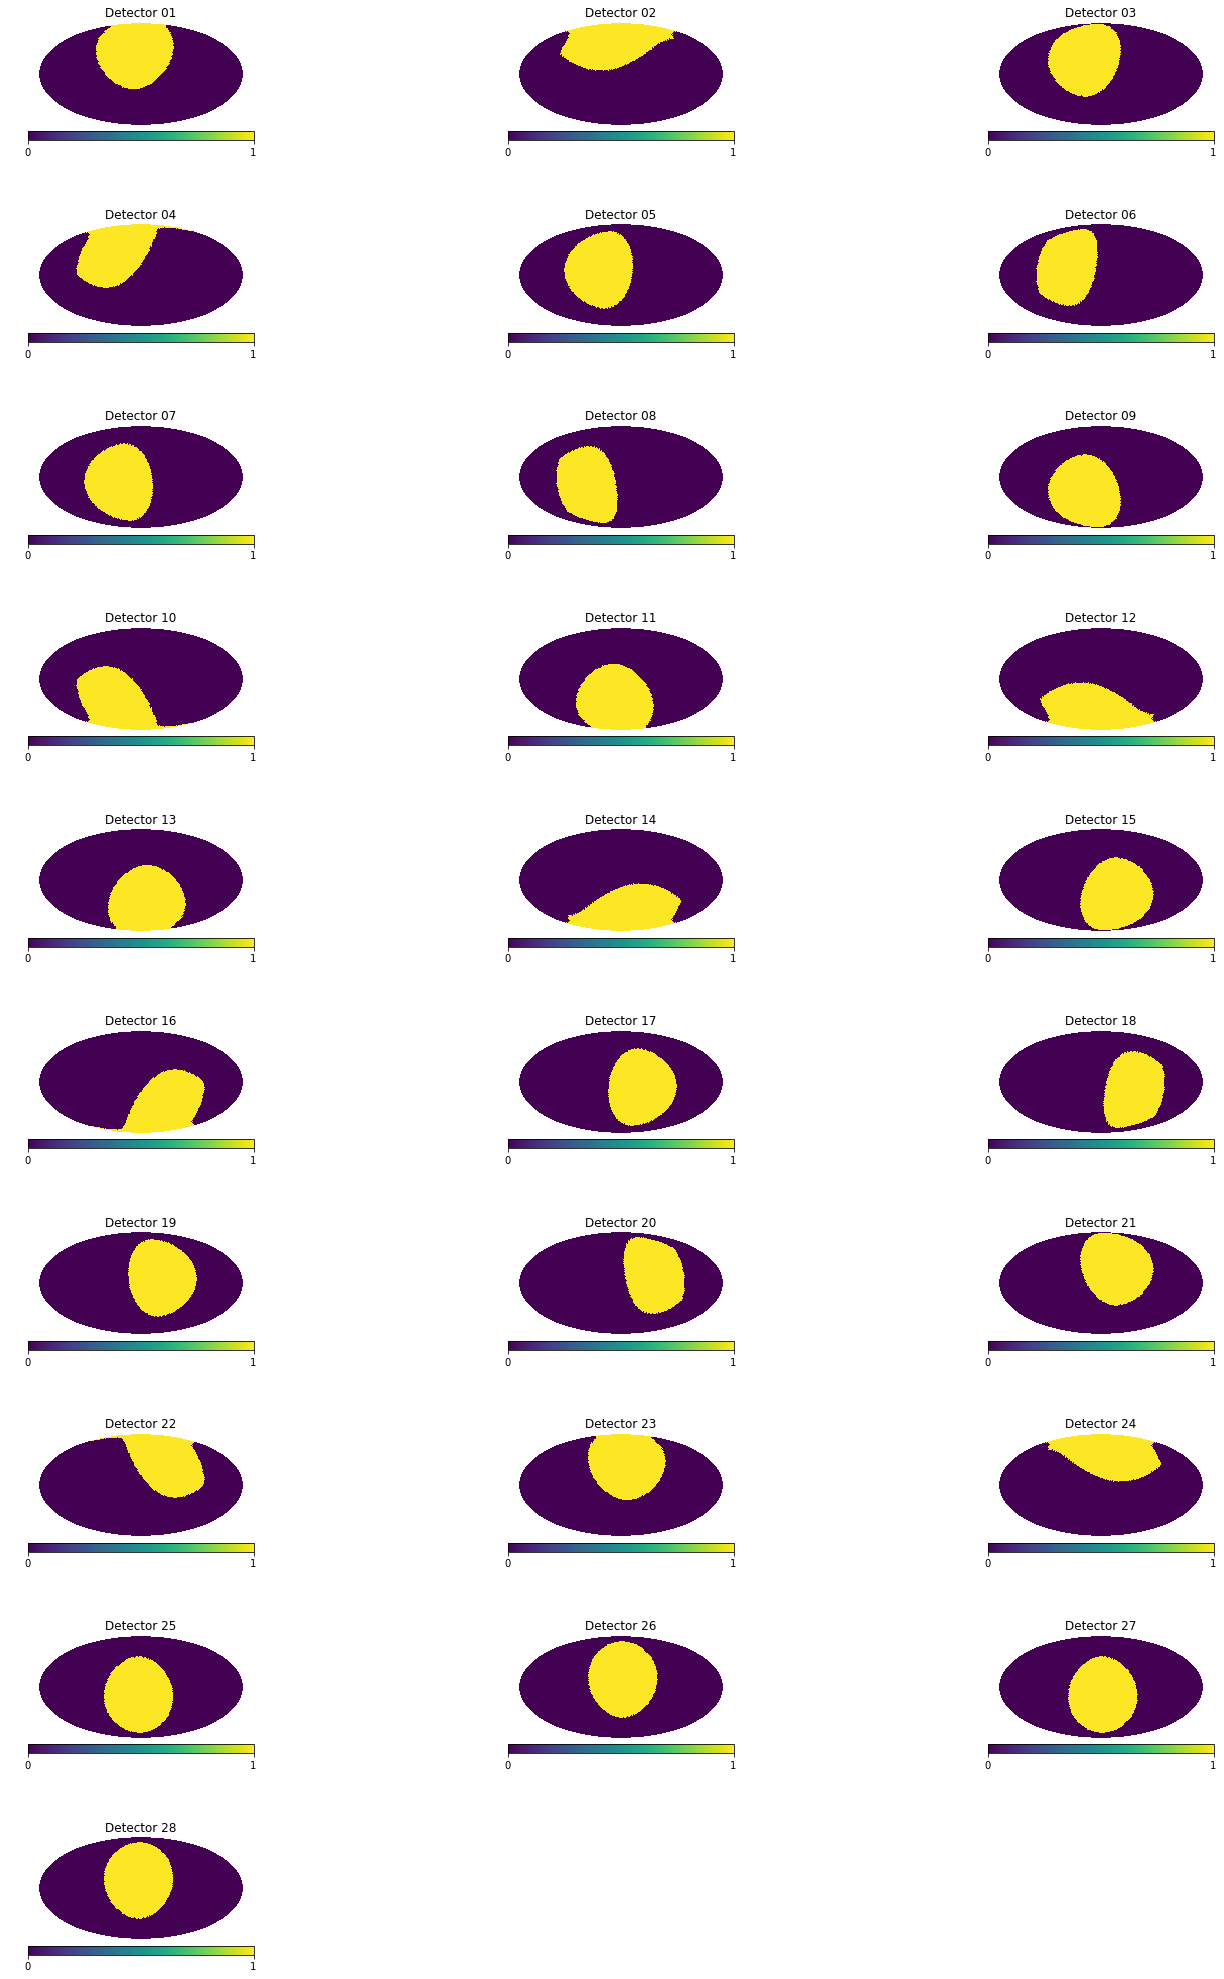

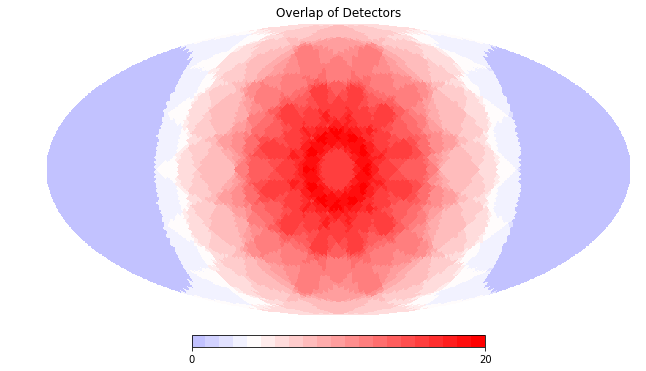

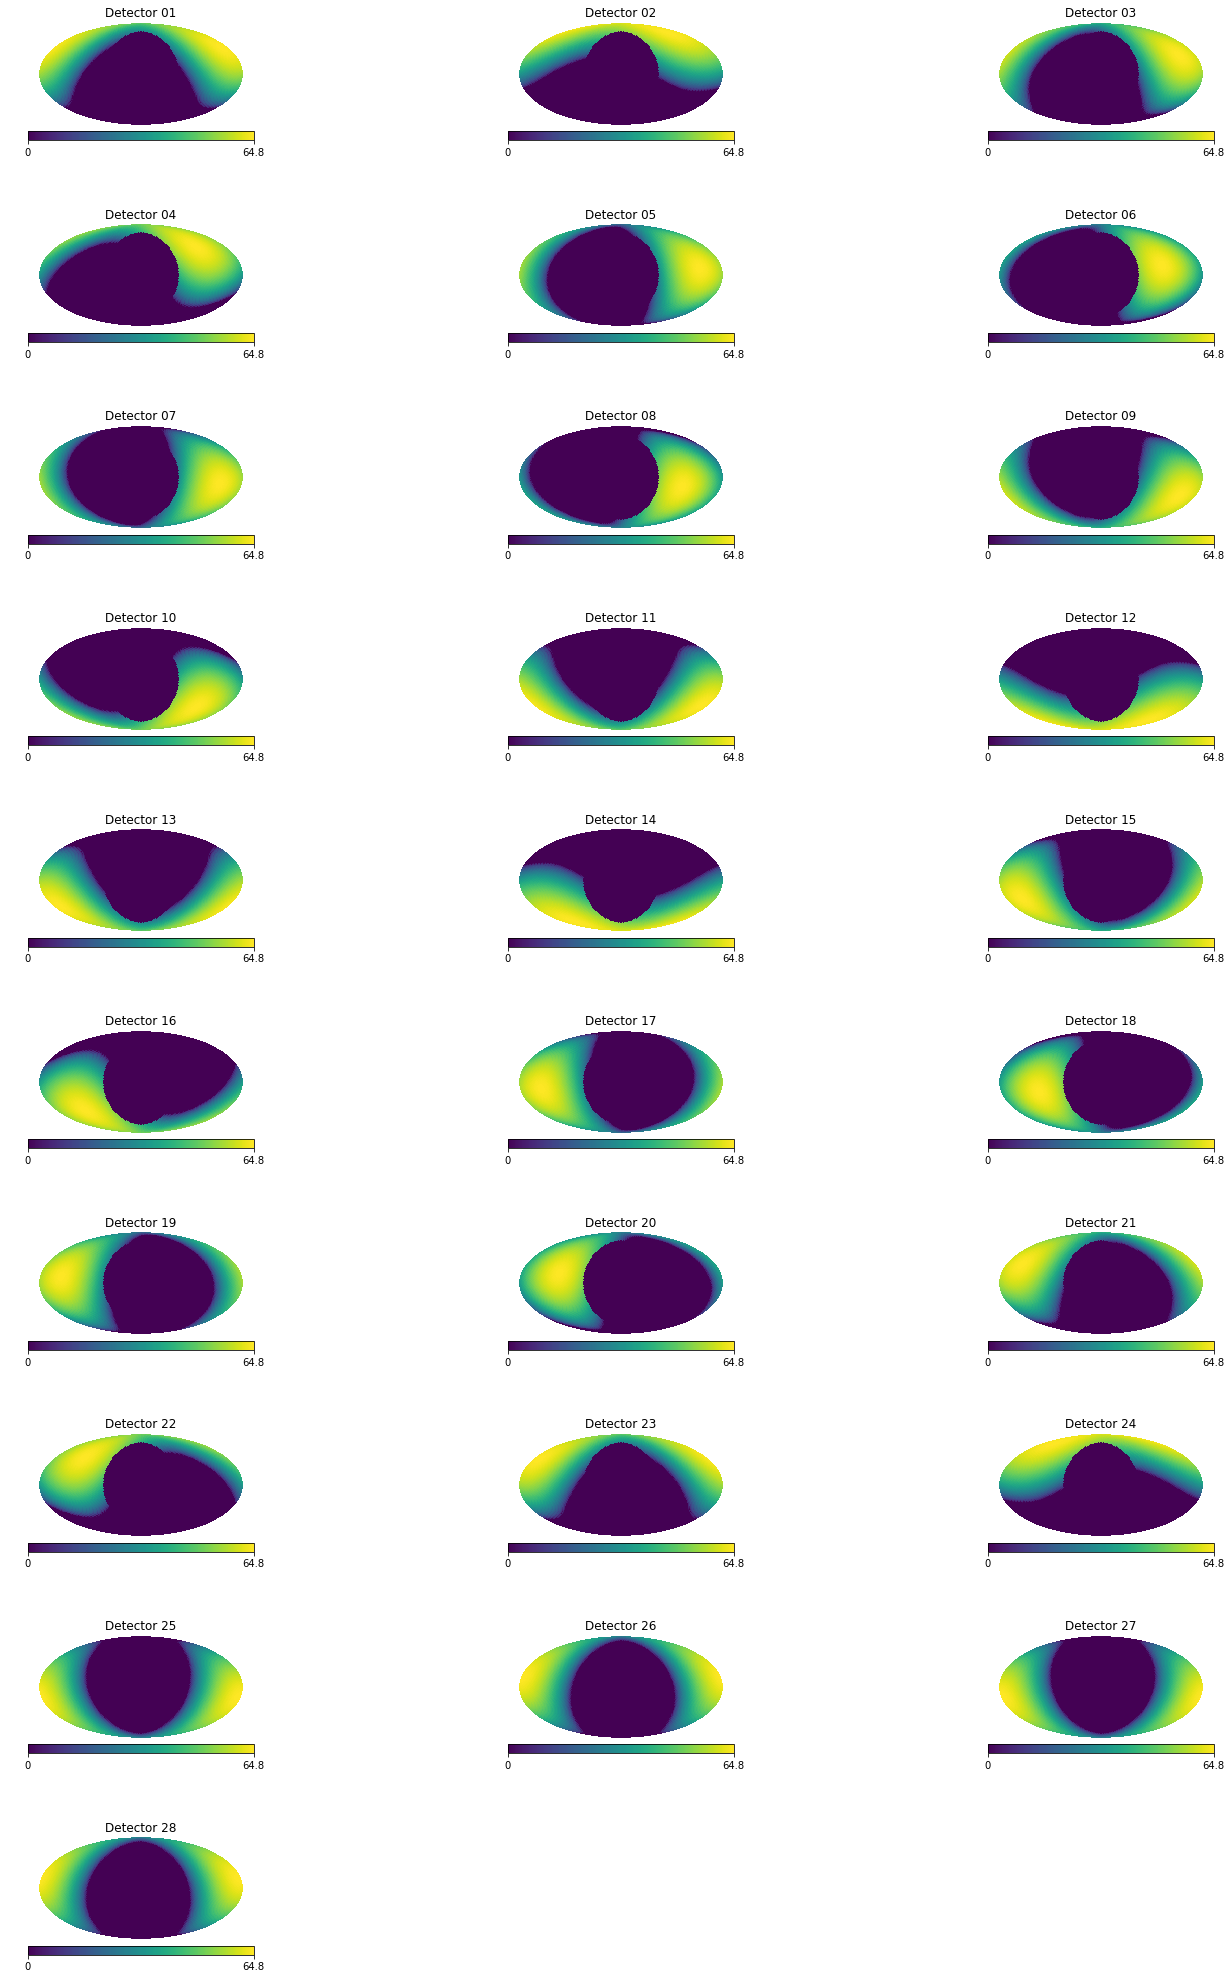

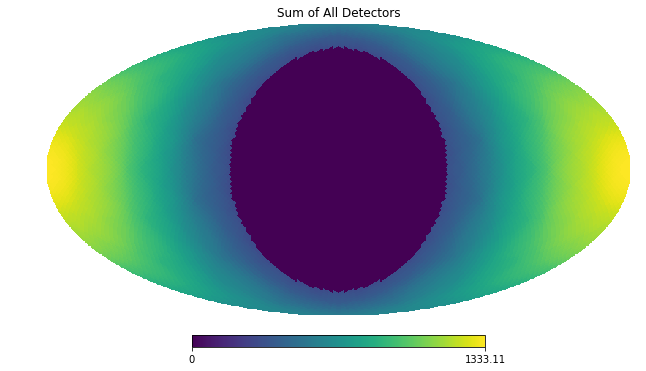

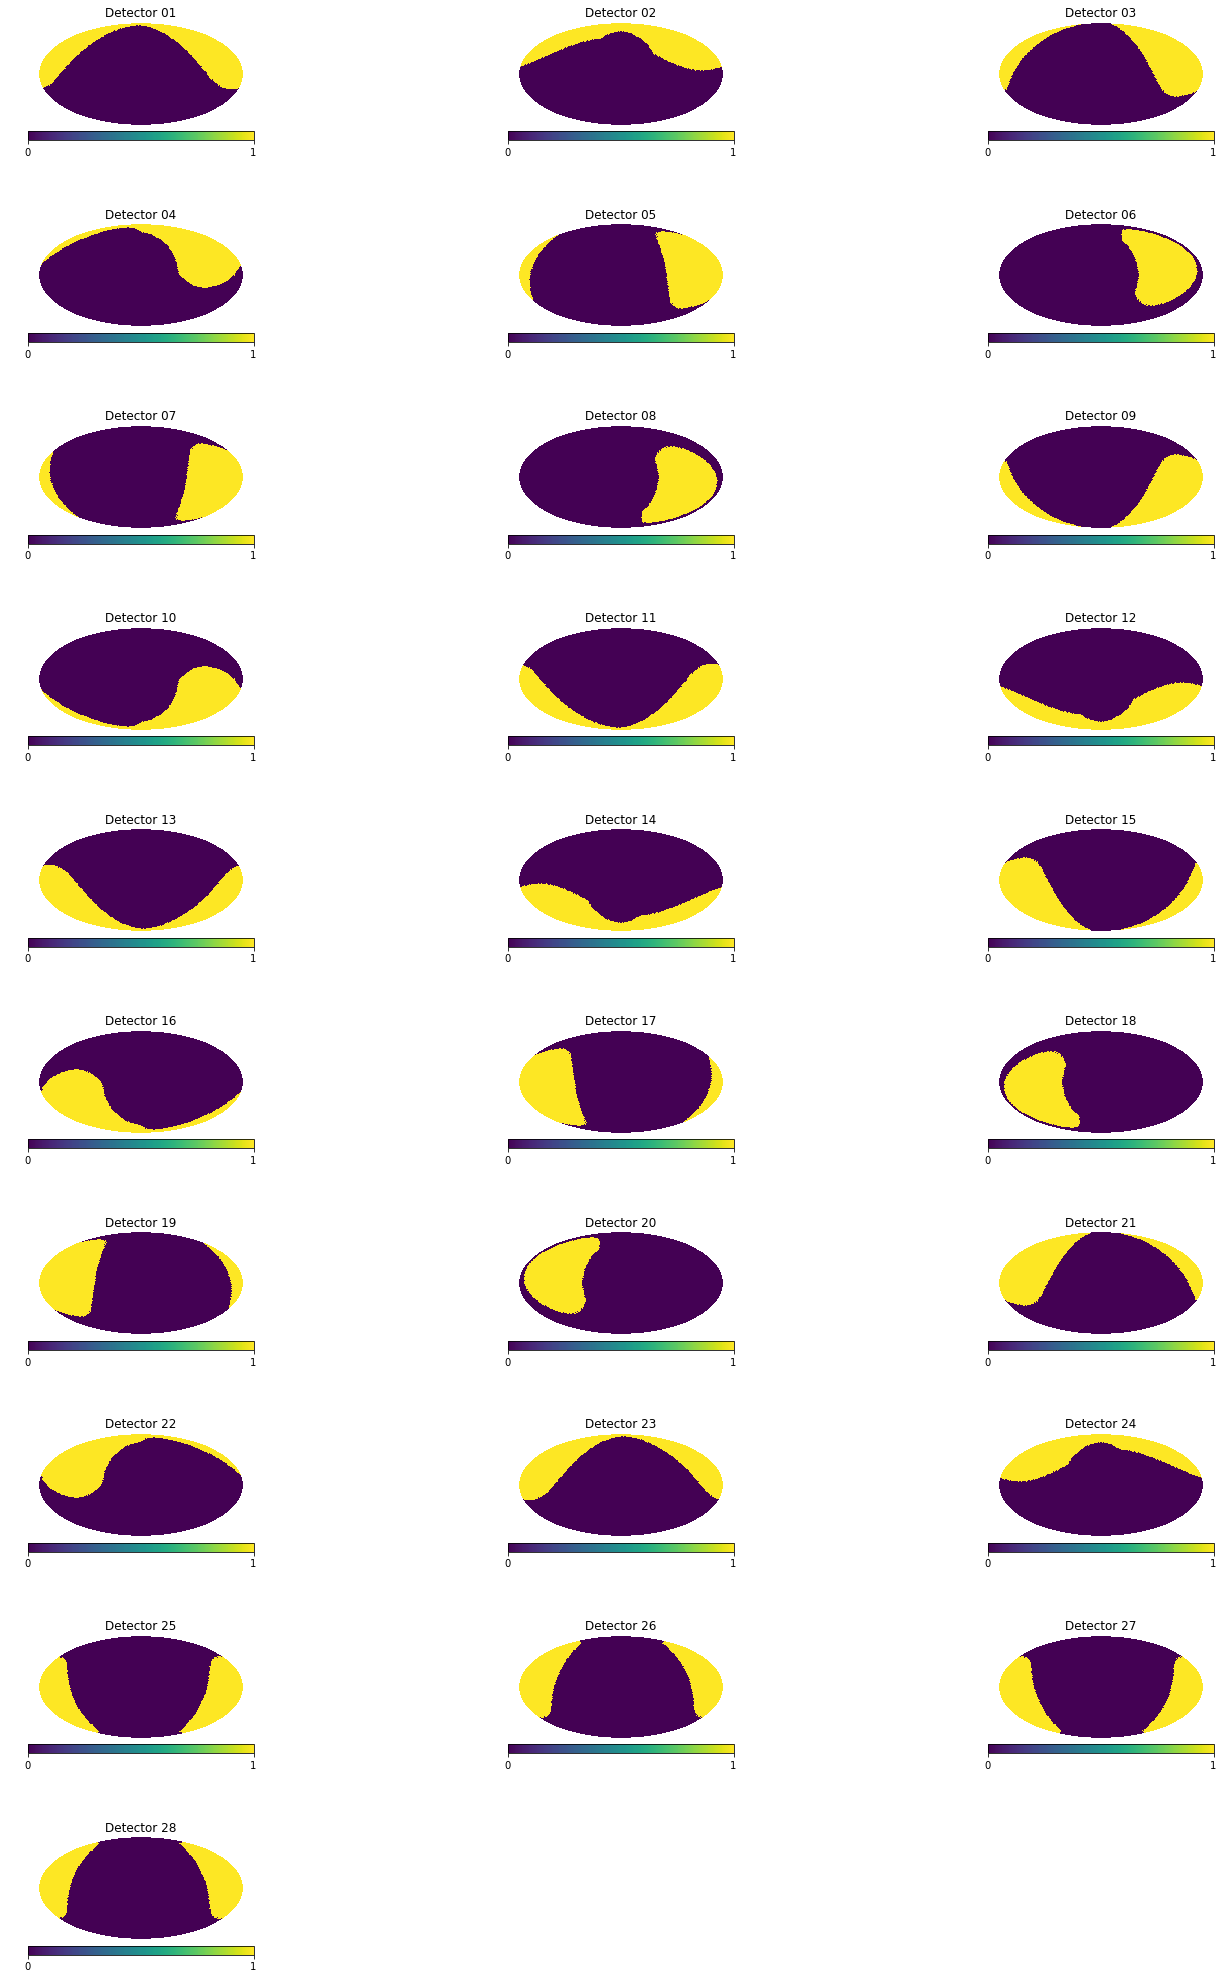

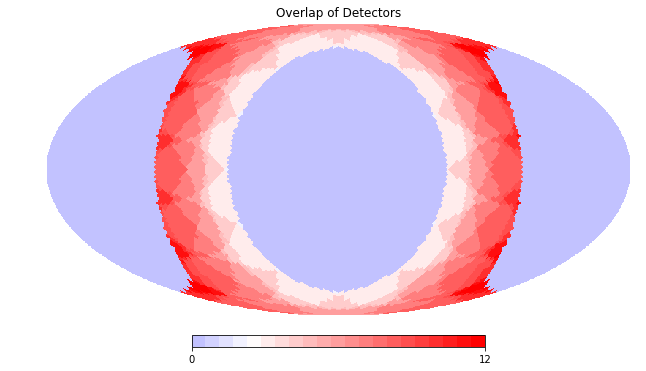

In [13]:
## 28 BC detectors with 7 clusters of 4 offset by 10 deg in each direction
ang=55.
off=15.
bia_pointings = {'01': (str(30-off)+':0:0',str(ang-off)+':0:0'),
                '02': (str(30-off)+':0:0',str(ang+off)+':0:0'),
                '03': (str(30+off)+':0:0',str(ang-off)+':0:0'),
                '04': (str(30+off)+':0:0',str(ang+off)+':0:0'),
                '05': (str(90-off)+':0:0',str(ang-off)+':0:0'),
                '06': (str(90-off)+':0:0',str(ang+off)+':0:0'),
                '07': (str(90+off)+':0:0',str(ang-off)+':0:0'),
                '08': (str(90+off)+':0:0',str(ang+off)+':0:0'),
                '09': (str(150-off)+':0:0',str(ang-off)+':0:0'),
                '10': (str(150-off)+':0:0',str(ang+off)+':0:0'),
                '11': (str(150+off)+':0:0',str(ang-off)+':0:0'),
                '12': (str(150+off)+':0:0',str(ang+off)+':0:0'),
                '13': (str(210-off)+':0:0',str(ang-off)+':0:0'),
                '14': (str(210-off)+':0:0',str(ang+off)+':0:0'),
                '15': (str(210+off)+':0:0',str(ang-off)+':0:0'),
                '16': (str(210+off)+':0:0',str(ang+off)+':0:0'),
                '17': (str(270-off)+':0:0',str(ang-off)+':0:0'),
                '18': (str(270-off)+':0:0',str(ang+off)+':0:0'),
                '19': (str(270+off)+':0:0',str(ang-off)+':0:0'),
                '20': (str(270+off)+':0:0',str(ang+off)+':0:0'),
                '21': (str(330-off)+':0:0',str(ang-off)+':0:0'),
                '22': (str(330-off)+':0:0',str(ang+off)+':0:0'),
                '23': (str(330+off)+':0:0',str(ang-off)+':0:0'),
                '24': (str(330+off)+':0:0',str(ang+off)+':0:0'),
                '25': (str(0-off)+':0:0',str(0-off)+':0:0'),
                '26': (str(0-off)+':0:0',str(0+off)+':0:0'),
                '27': (str(0+off)+':0:0',str(0-off)+':0:0'),
                '28': (str(0+off)+':0:0',str(0+off)+':0:0')}

sc,fs,exposure_positions,pointings,exposures=plot_exposures(bia_pointings,Aeff_fact_norm,index=index_norm) 
fs_det=num_detectors(sc,exposure_positions,pointings)
sc2,fs2,exposure_positions2,pointings2,exposures=plot_exposures(bia_pointings,Aeff_fact_norm,index=index_norm,lat='0:0:0',lon='80:0:0',antiEarth=True,Earth=False) 
fs_det2=num_detectors(sc2,exposure_positions2,pointings2)#,antiEarth=True)

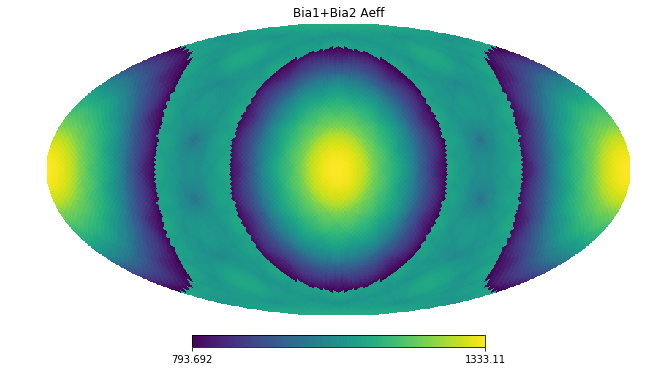

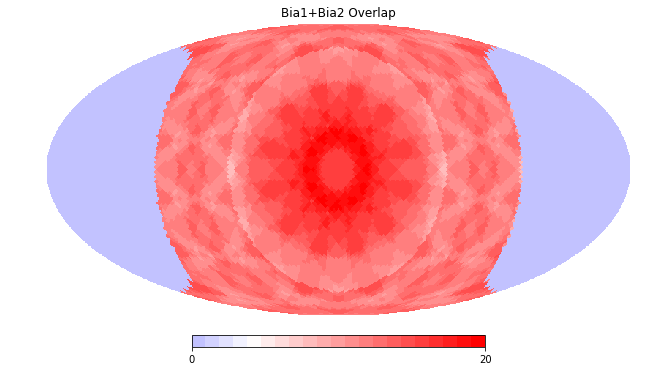

In [14]:
hp.mollview(fs+fs2,title='Bia1+Bia2 Aeff')
cmap_skewed=colormap_skewed(fs_det+fs_det2)
hp.mollview(fs_det+fs_det2,title='Bia1+Bia2 Overlap',cmap=cmap_skewed)

/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


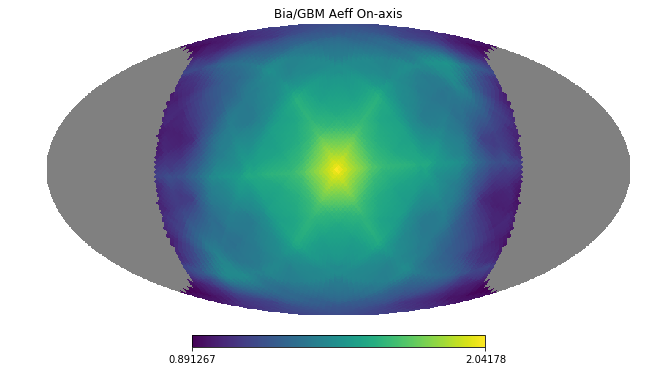

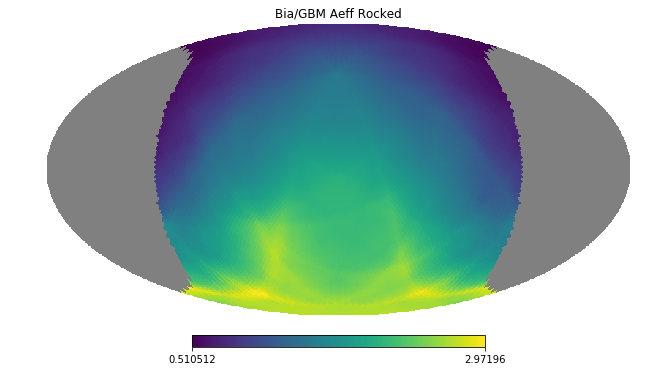

In [15]:
# Ratio of Bia to GBM Aeff for GBM both on-axis and rocked
hp.mollview(fs/gbm_fs_onaxis,title='Bia/GBM Aeff On-axis')
hp.mollview(fs/gbm_fs_rocked,title='Bia/GBM Aeff Rocked')

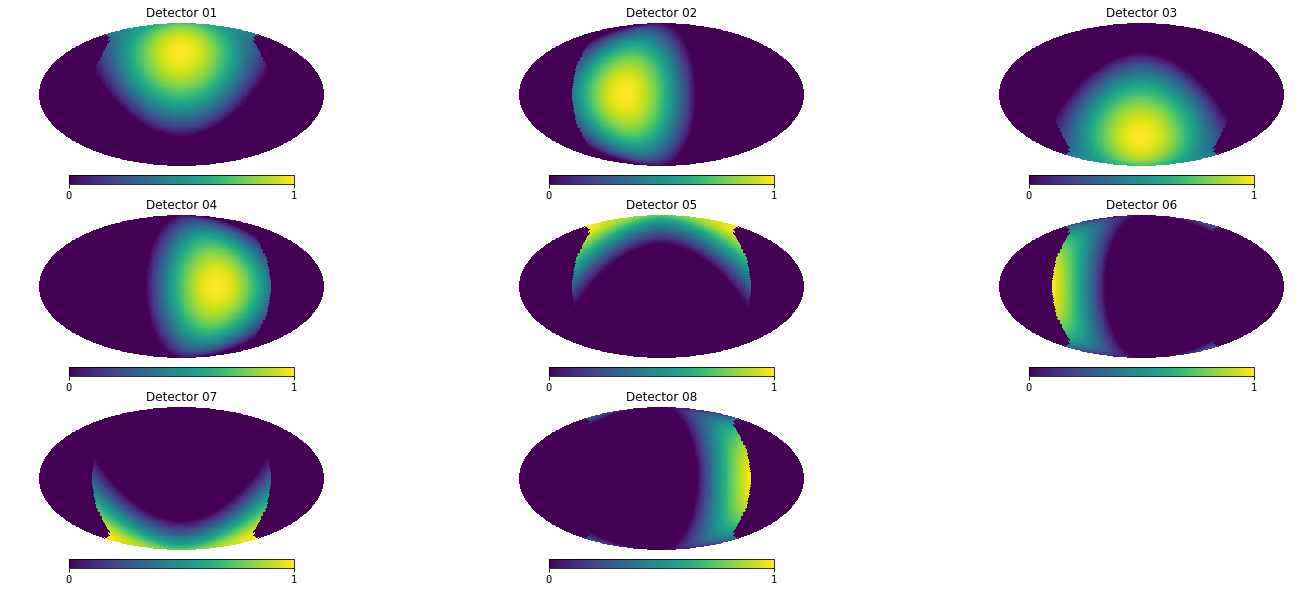

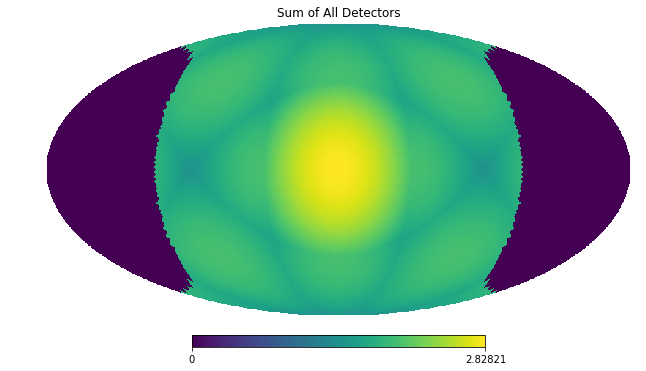

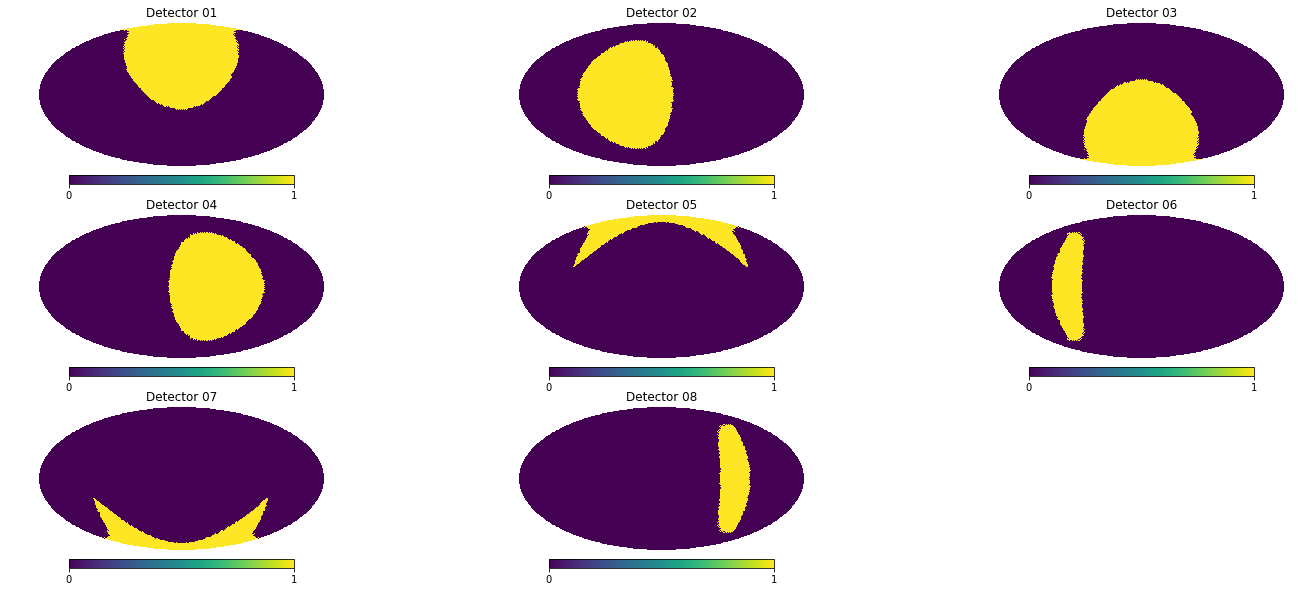

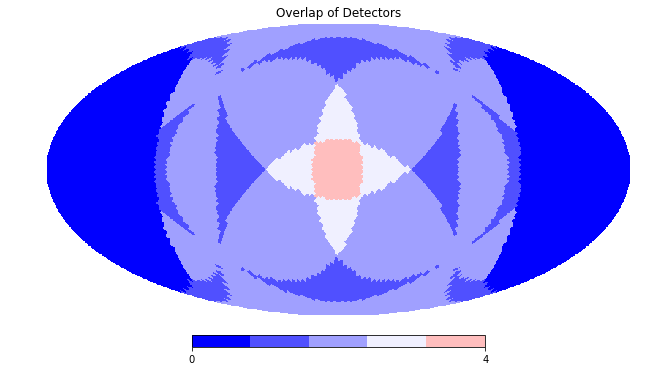

In [16]:
## 8 BATSE Octahedron detectors
ang=45
bia_pointings = {'01': ('0:0:0',str(ang)+':0:0'),
                 '02': ('90:0:0',str(ang)+':0:0'),
                 '03': ('180:0:0',str(ang)+':0:0'),
                 '04': ('270:0:0',str(ang)+':0:0'),
                 '05': ('0:0:0',str(ang+90)+':0:0'),
                 '06': ('90:0:0',str(ang+90)+':0:0'),
                 '07': ('180:0:0',str(ang+90)+':0:0'),
                 '08': ('270:0:0',str(ang+90)+':0:0')}
Aeff_fact=1
sc,fs,exposure_positions,pointings,exposures=plot_exposures(bia_pointings,Aeff_fact) 
fs_det=num_detectors(sc,exposure_positions,pointings)

In [17]:
print fs_det2

[6. 6. 6. ... 6. 6. 6.]
